In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
credit = pd.read_csv('datasets/credit_data_risk.csv')

In [3]:
credit.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

In [4]:
del credit['Unnamed: 0']

In [5]:
credit.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)

In [7]:
numerical_credit = credit.select_dtypes(exclude='O')

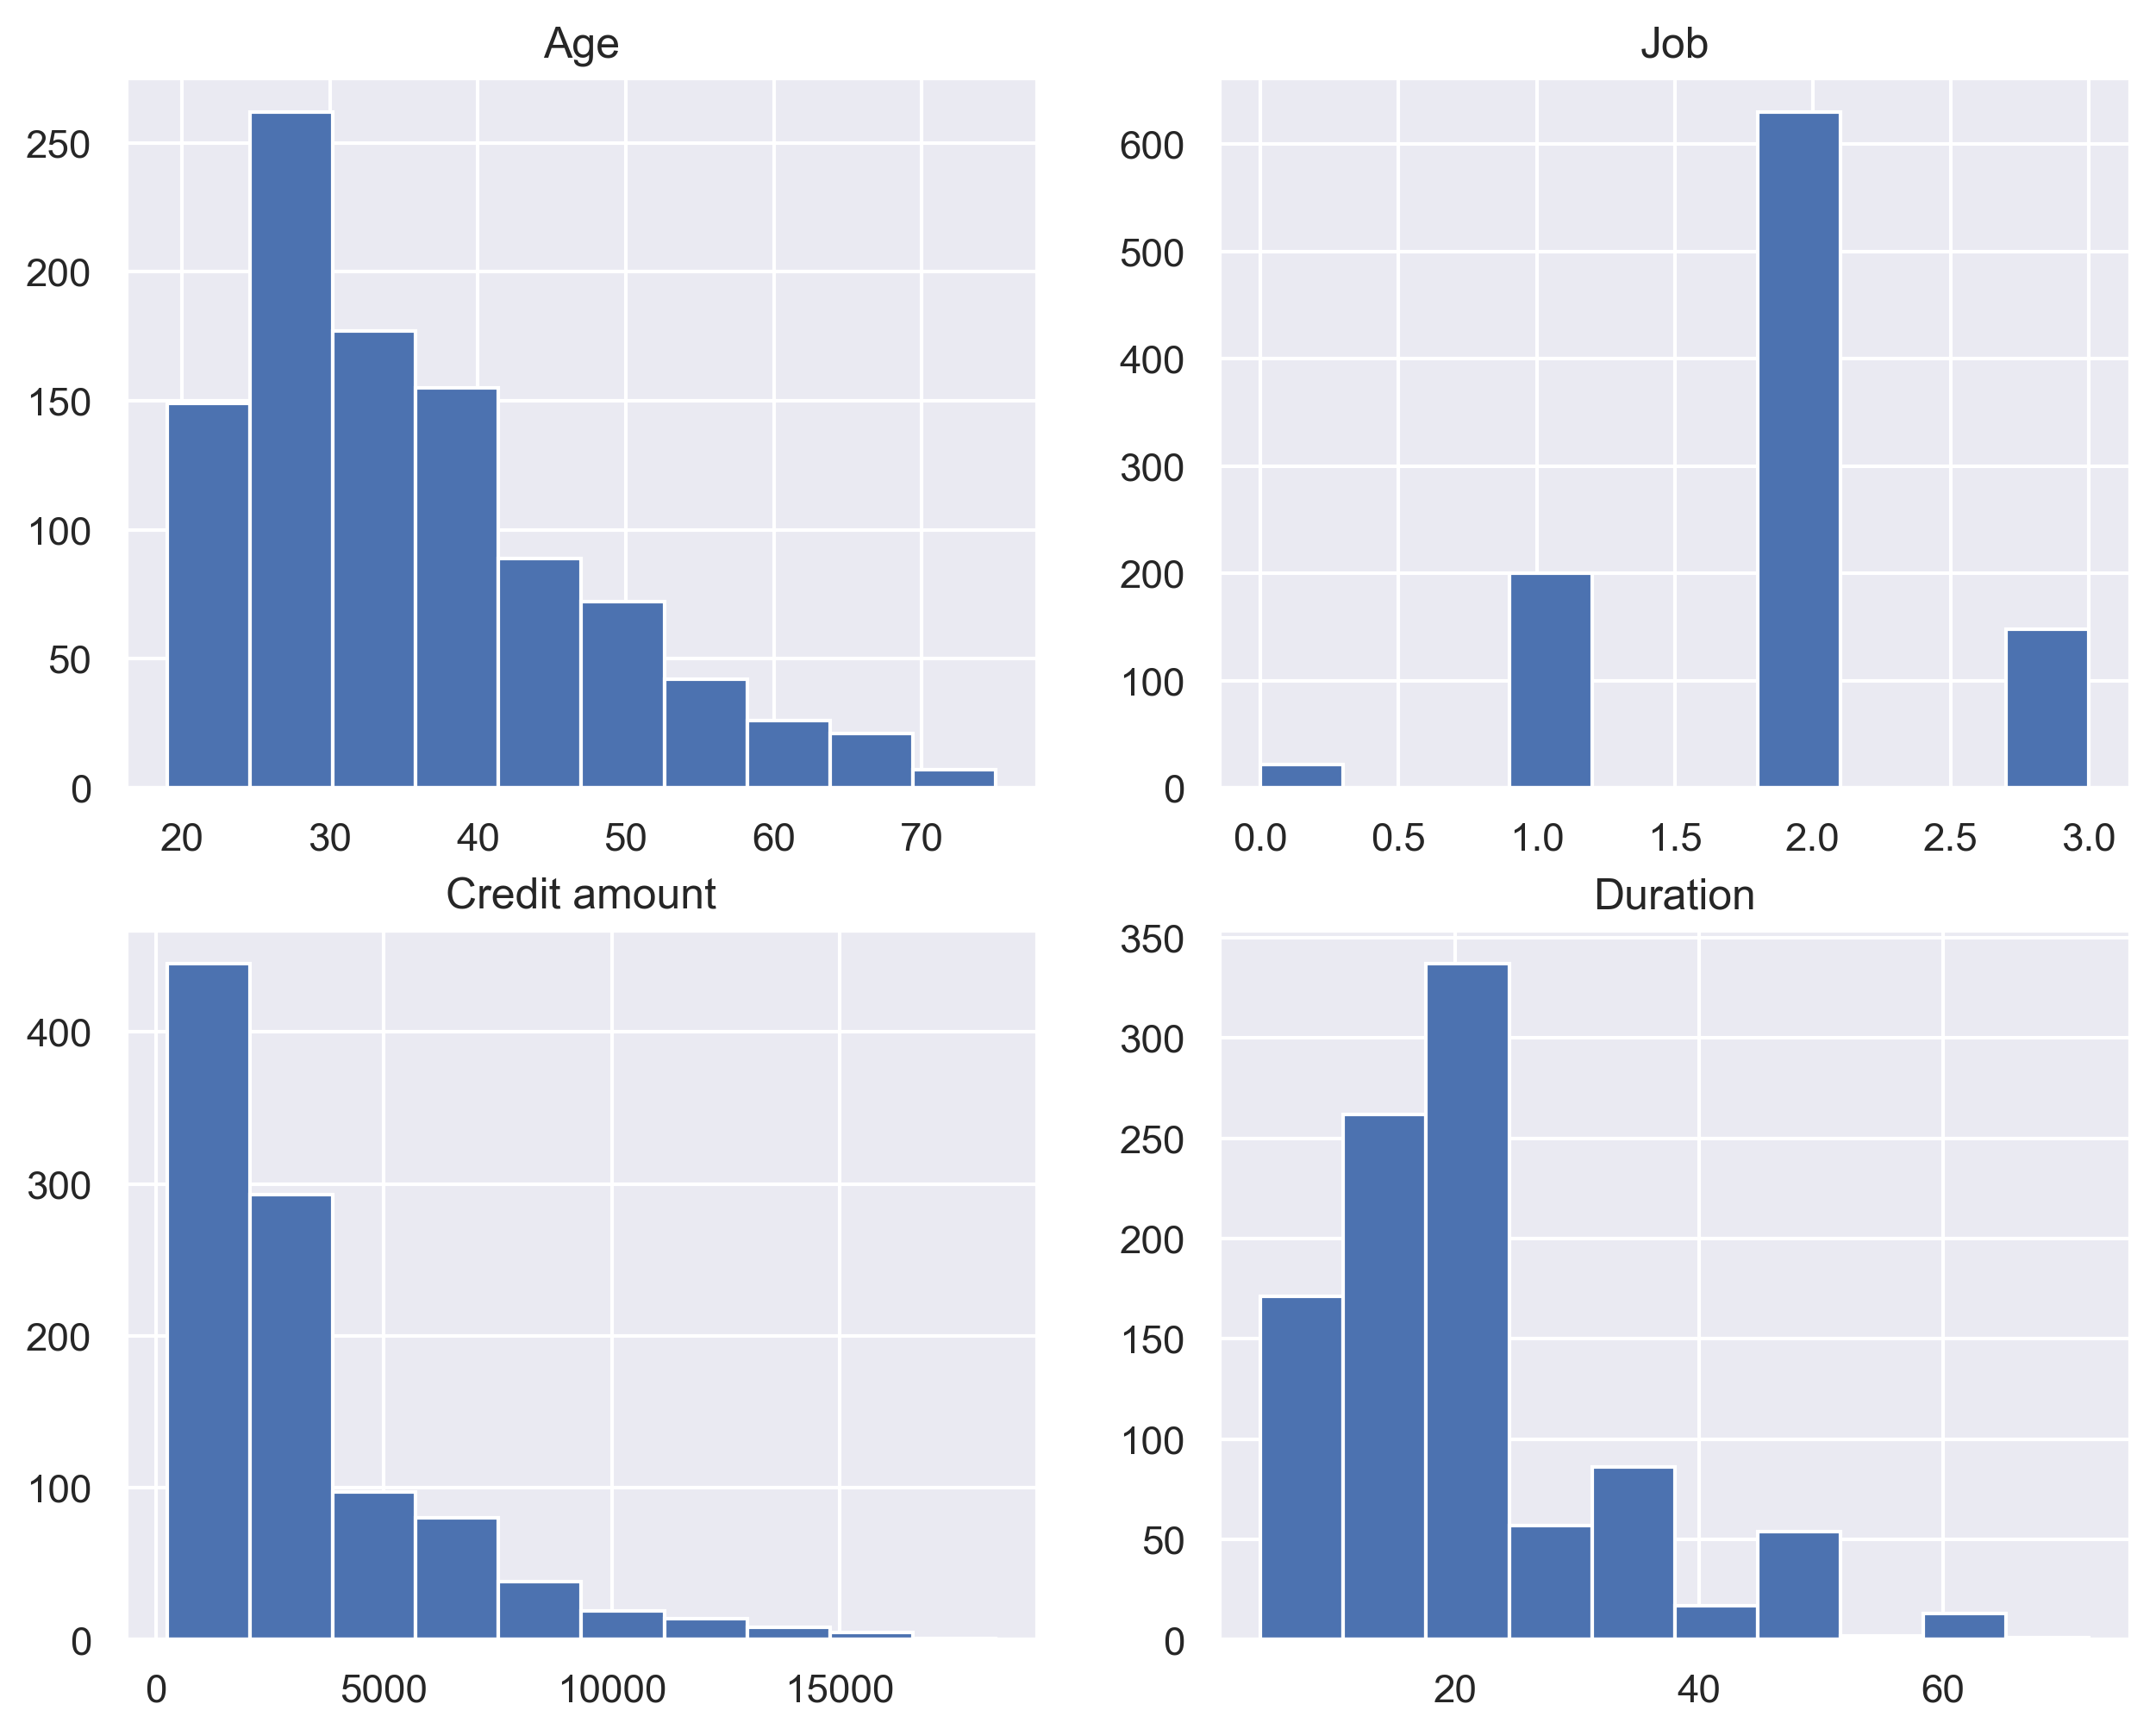

In [8]:
plt.figure(figsize=(10, 8))
k = 0
cols = numerical_credit.columns
for i, j in zip(range(len(cols)), cols):
    k +=1
    plt.subplot(2, 2, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [10]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

In [11]:
distance = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)

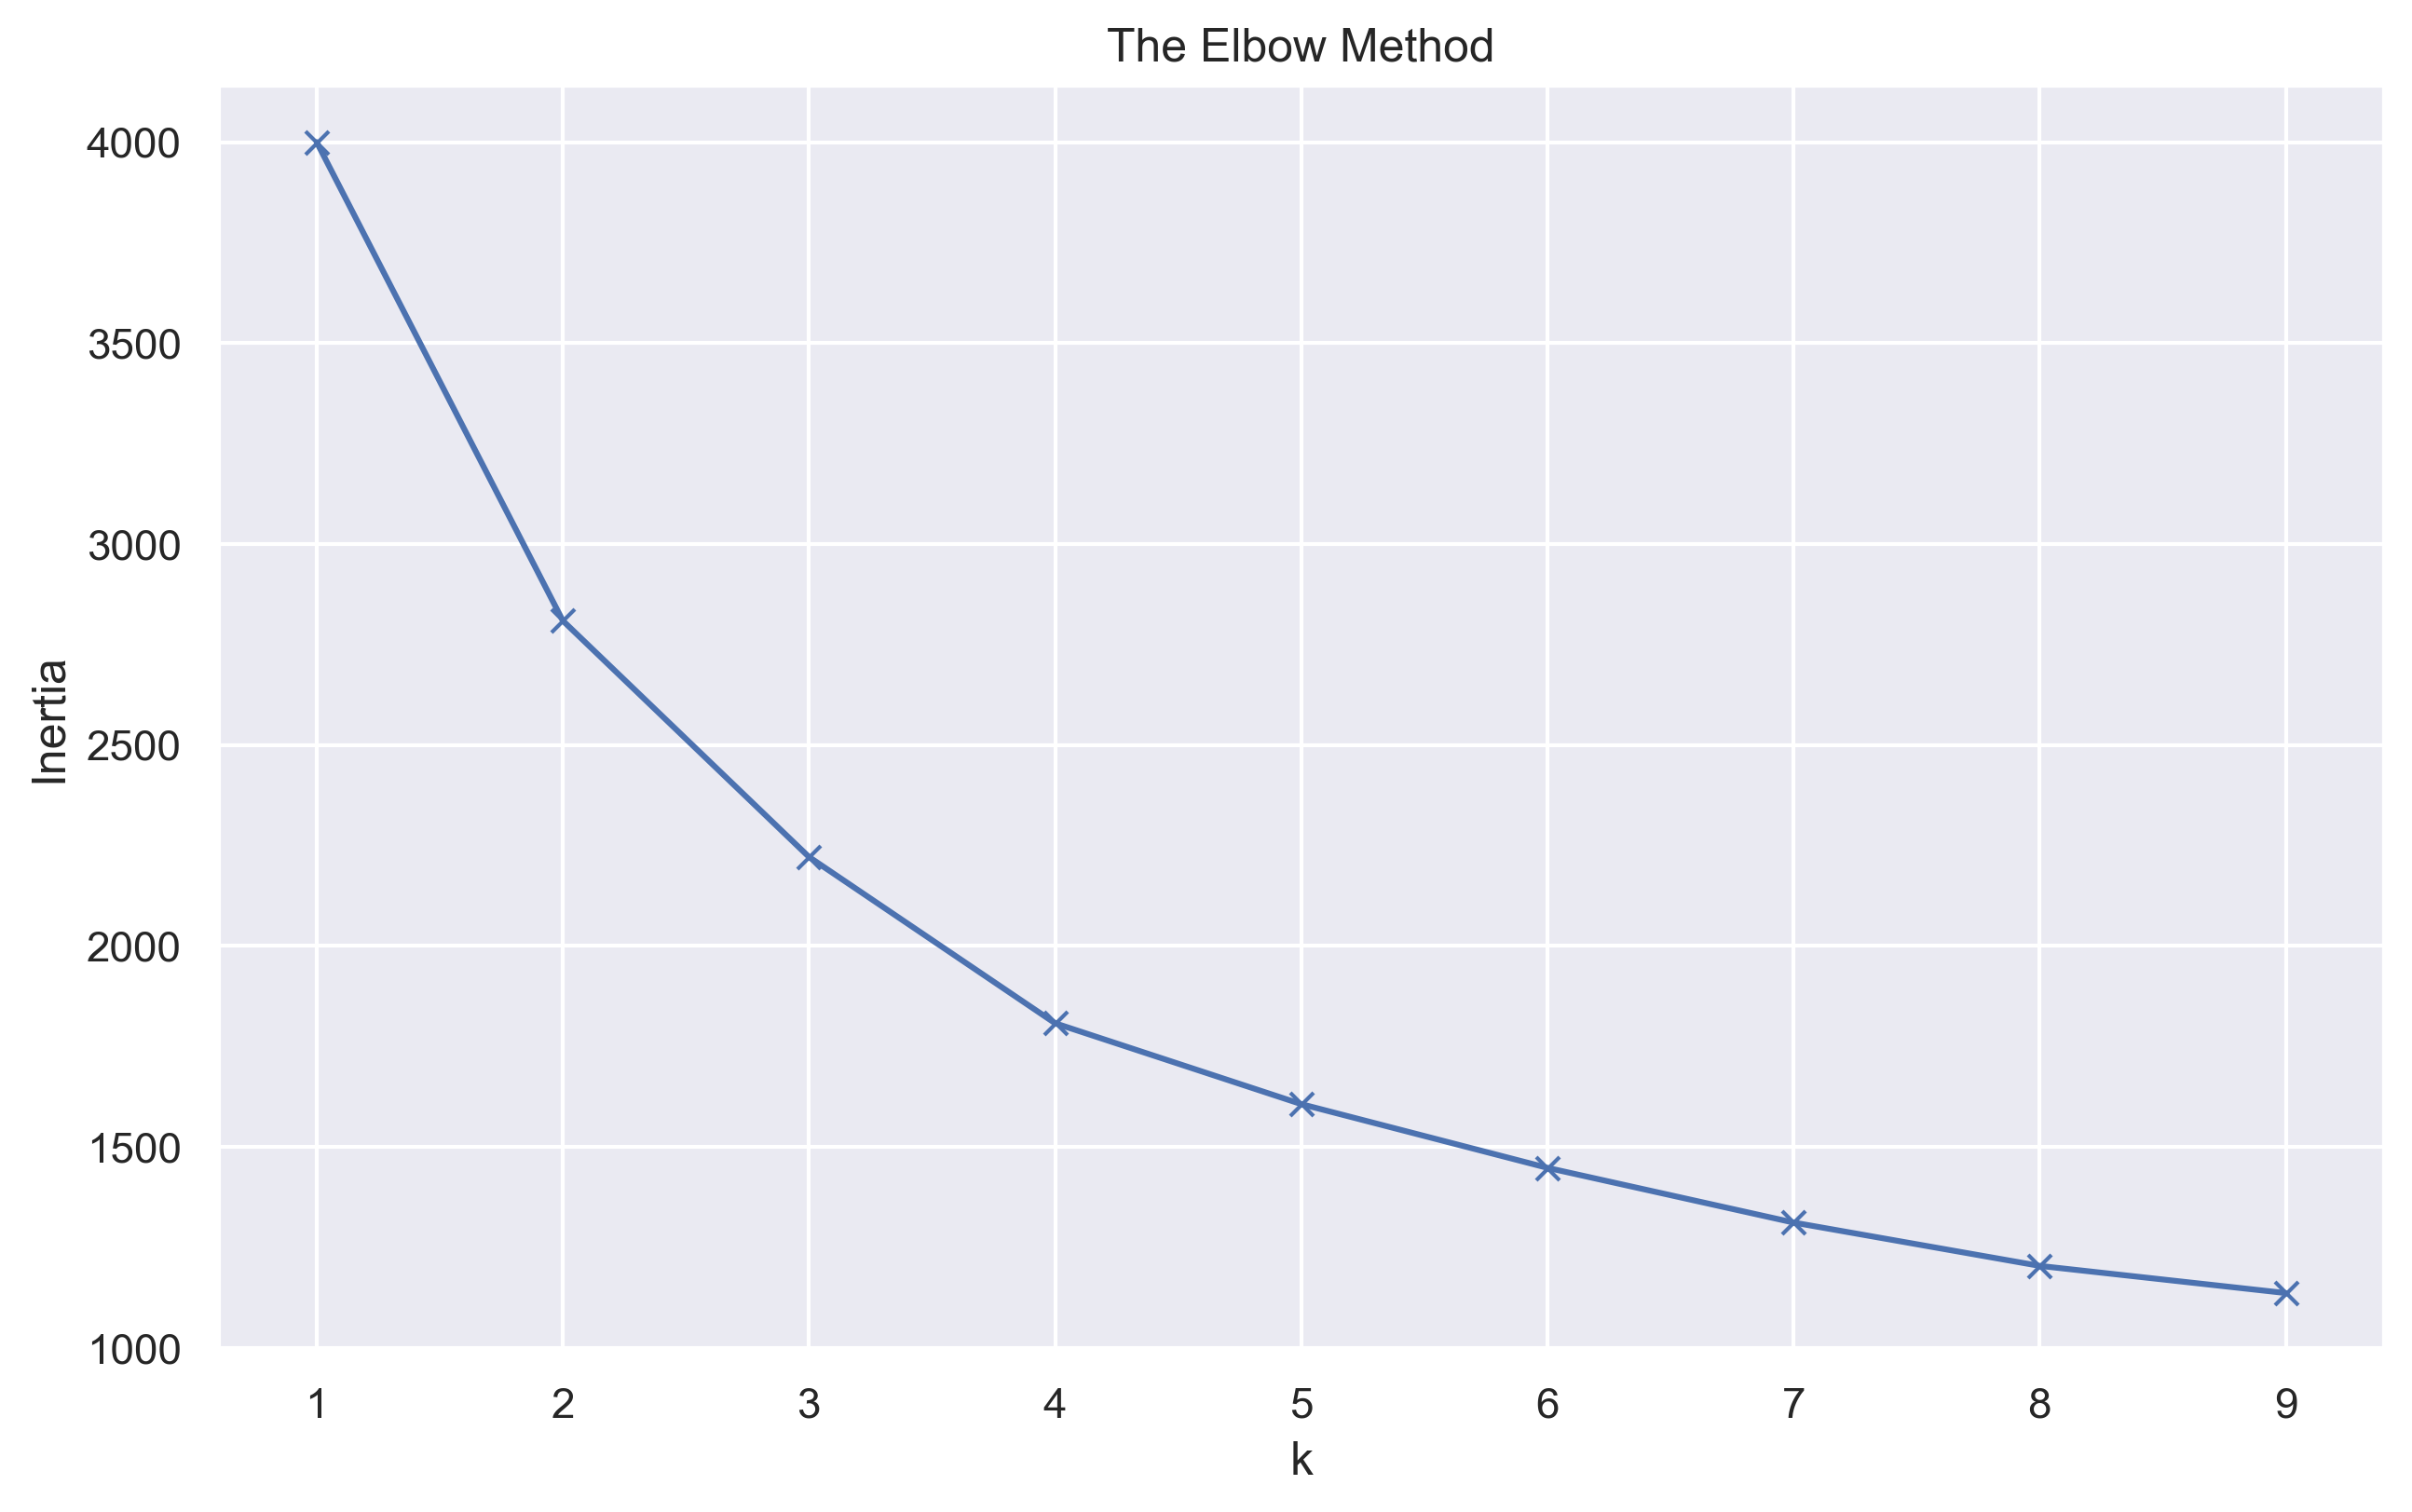

In [12]:
plt.plot(range(1, 10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [17]:
pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 5.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

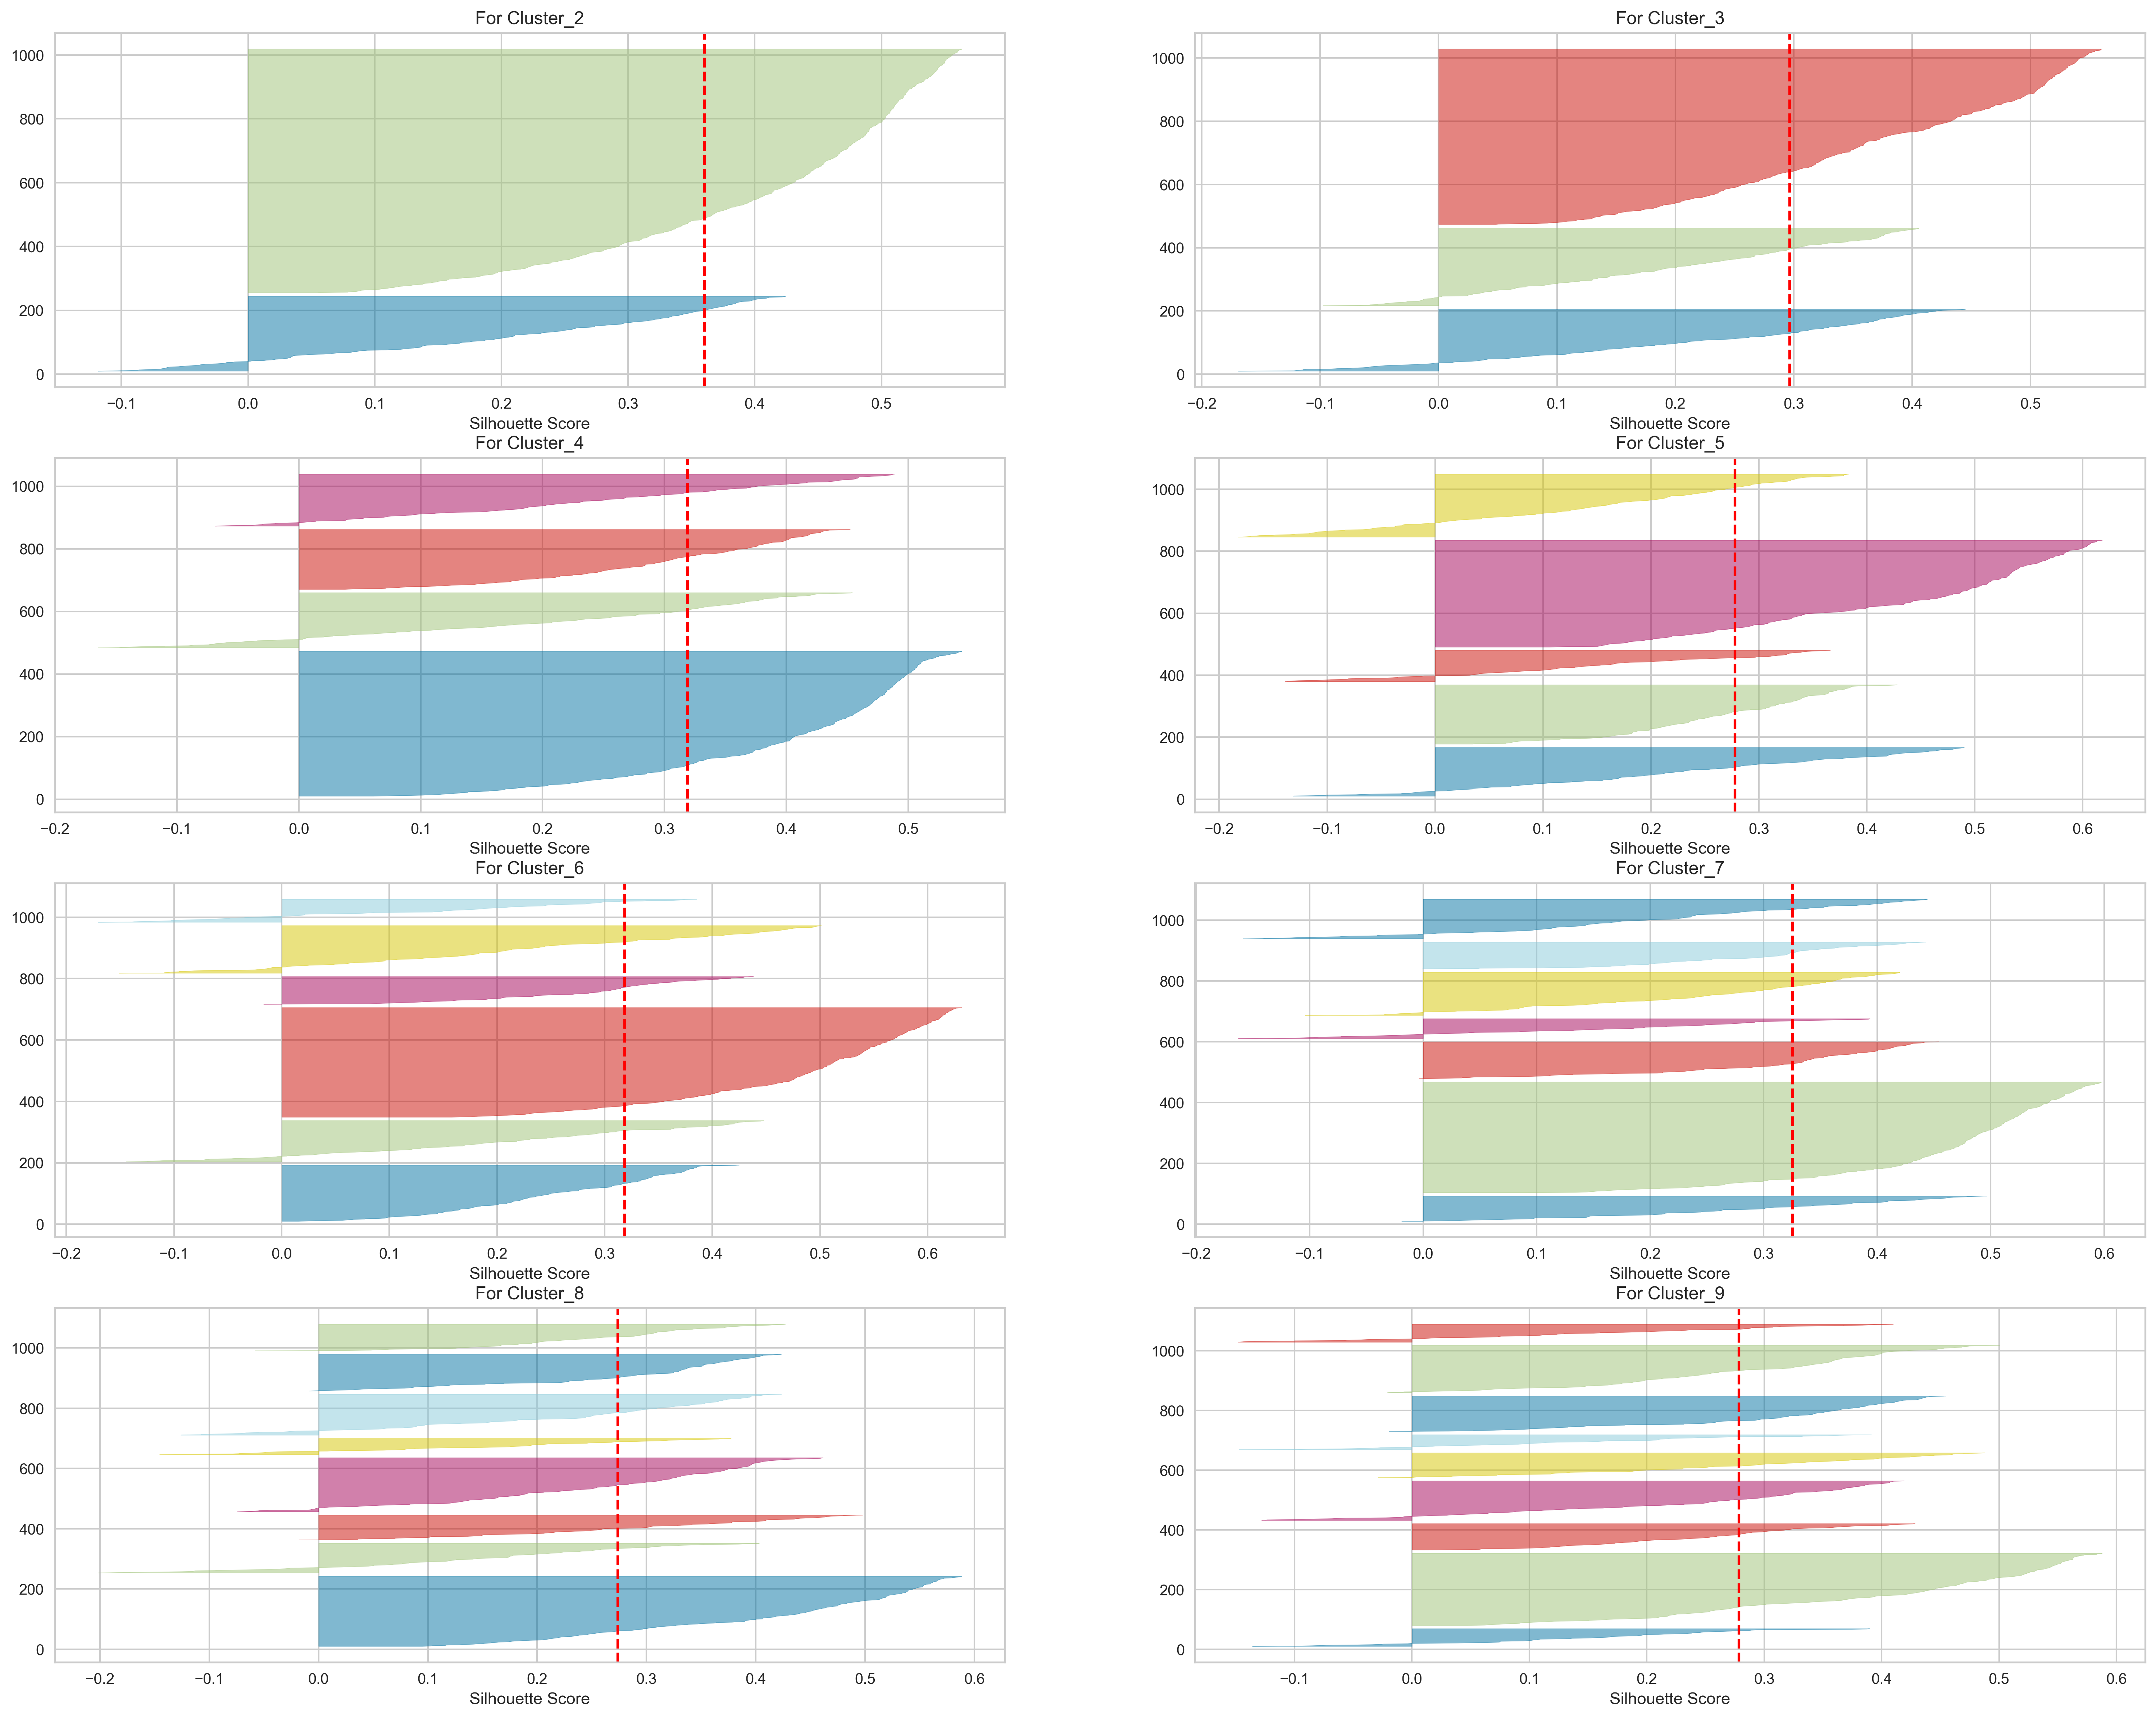

In [19]:
fig, ax = plt.subplots(4, 2, figsize=(25, 20))
for i in range(2, 10):
    km = KMeans(n_clusters=i)
    q, r = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',
                                      ax=ax[q - 1][r])
    visualizer.fit(scaled_credit)
    ax[q - 1][r].set_title("For Cluster_"+str(i))
    ax[q - 1][r].set_xlabel("Silhouette Score")

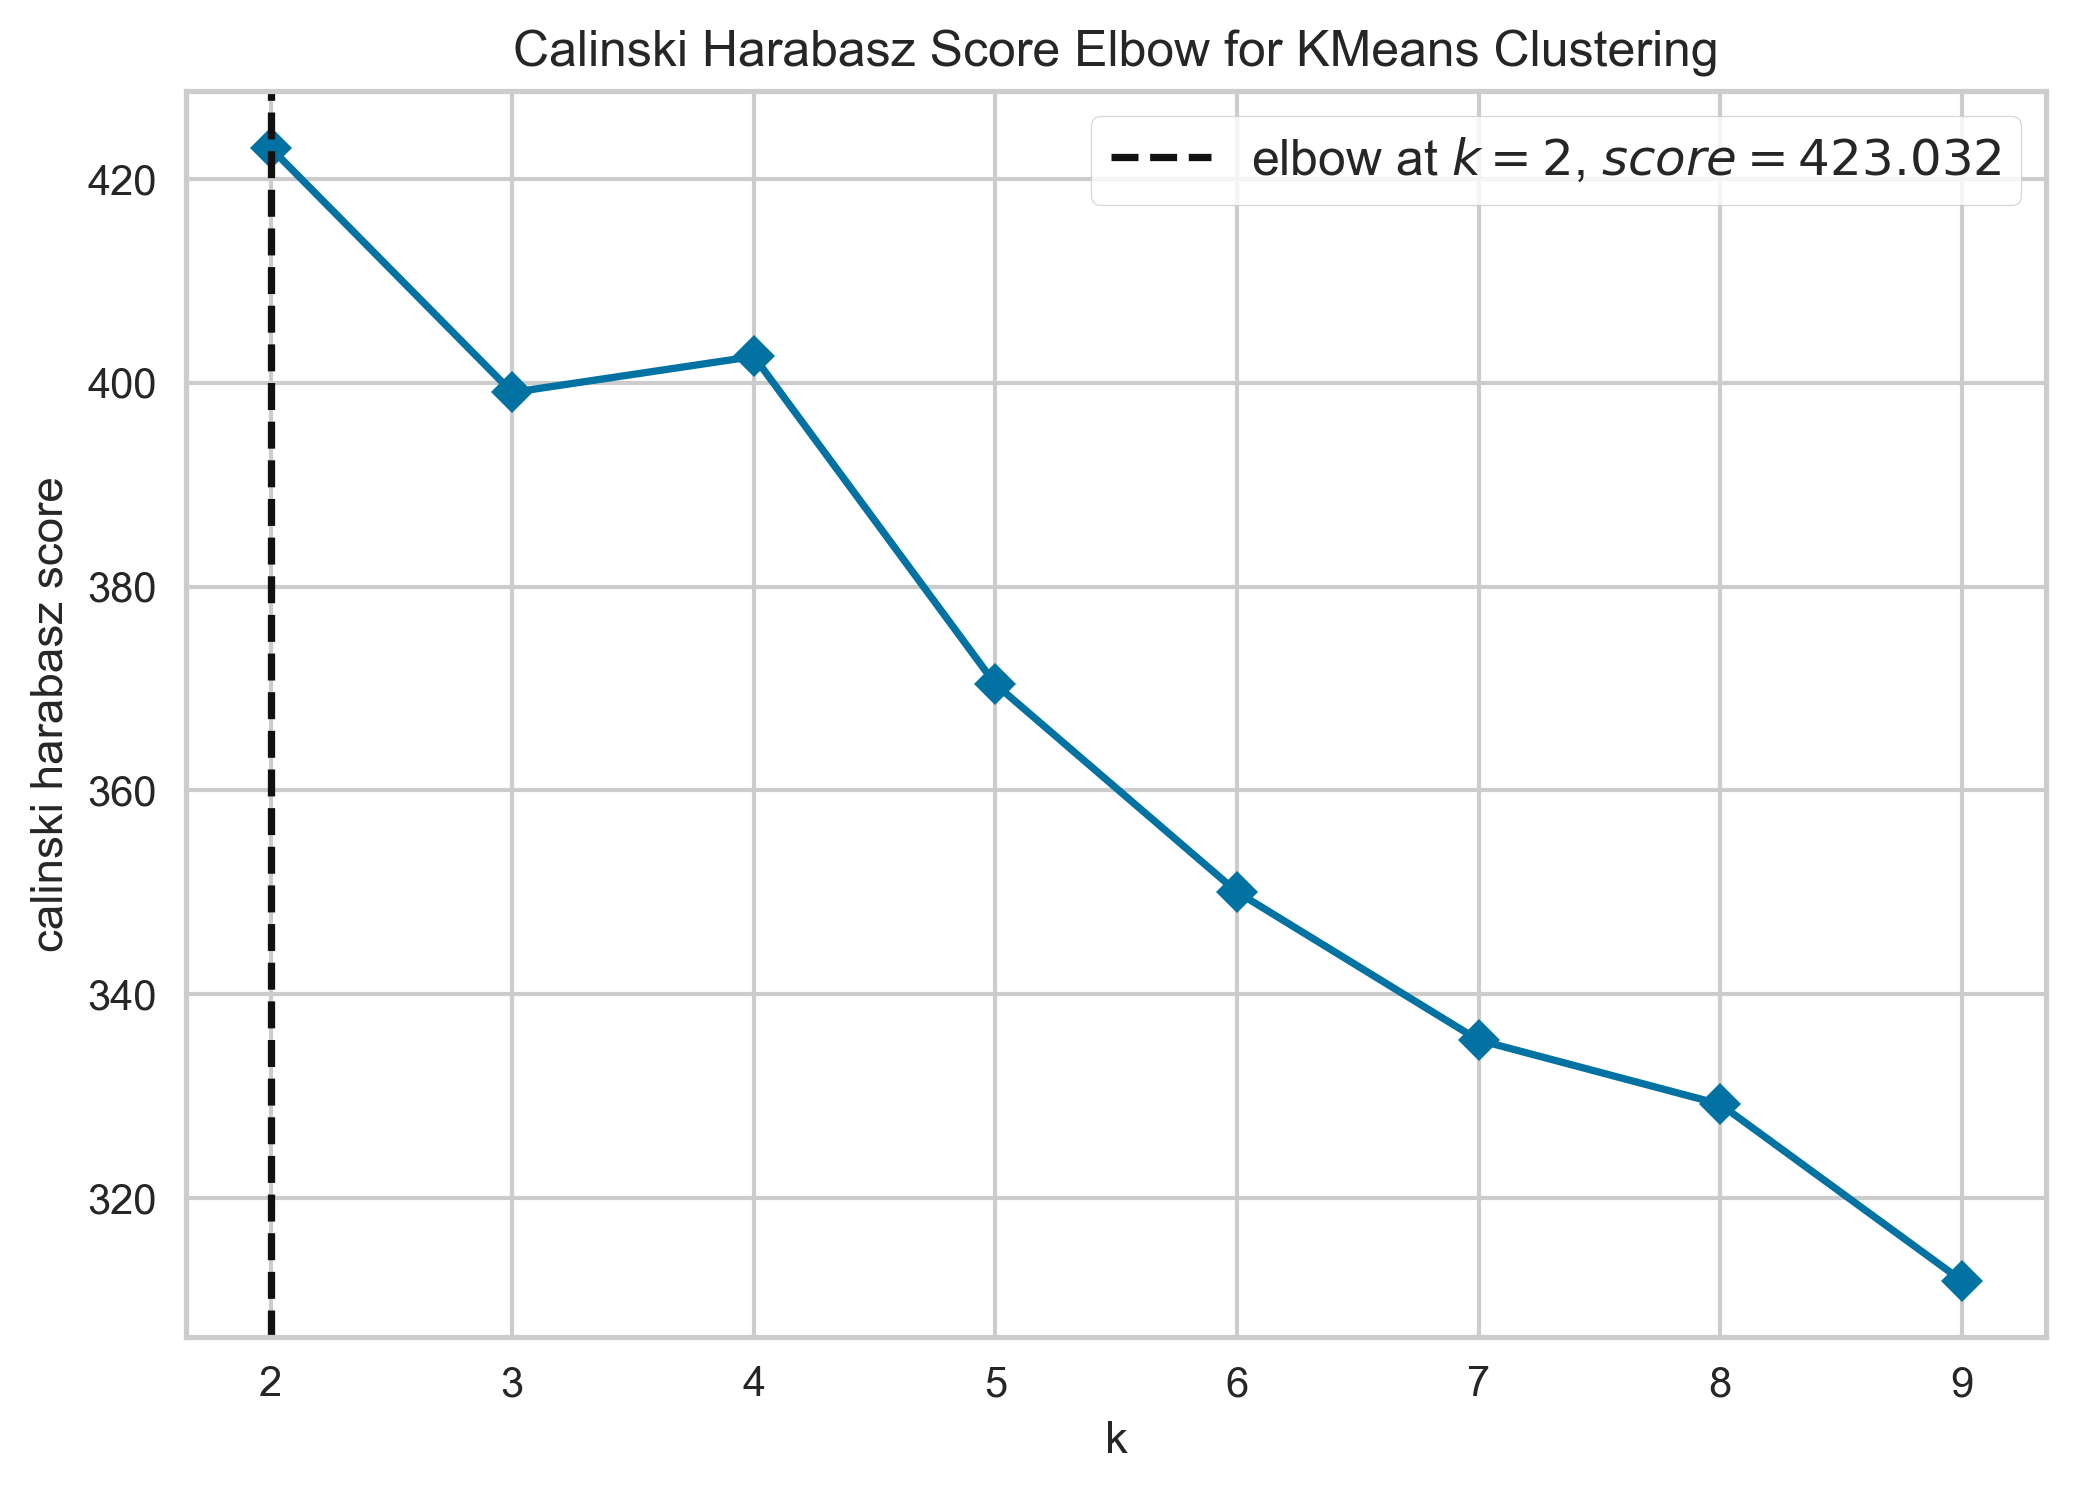

In [20]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10),
                              metric='calinski_harabasz',
                              timings=False)
visualizer.fit(scaled_credit)
visualizer.show();

In [29]:
#pip install gap-stat

In [30]:
from gap_statistic.optimalK import OptimalK

In [31]:
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters = optimalK(scaled_credit, cluster_array=np.arange(1, 10))

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/gap_statistic/optimalK.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gap_df = gap_df.append(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/gap_statistic/optimalK.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gap_df = gap_df.append(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/gap_statistic/optimalK.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gap_df = gap_df.append(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/gap_statistic/optimalK.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gap_df = gap_df.append(
/Users/rz/opt/anaconda3/lib/pyth

In [32]:
gap_result = optimalK.gap_df
gap_result.head()

n_clusters  gap_value         gap*  ref_dispersion_std        sk  \
0         1.0   0.899319  5832.331793          110.222967  0.012911   
1         2.0   0.936981  4408.930340          113.314586  0.018028   
2         3.0   0.984575  3958.818942          268.933471  0.049286   
3         4.0   1.097506  3624.717310          185.062974  0.039755   
4         5.0   1.072434  3186.135846          114.420580  0.027091   

           sk*      diff        diff*  
0  6735.799210 -0.019634  6516.076839  
1  5092.675386  0.001693  5031.897458  
2  4581.786060 -0.073175  4525.016231  
3  4190.914599  0.052162  4119.985851  
4  3681.404388 -0.025199  3644.273845

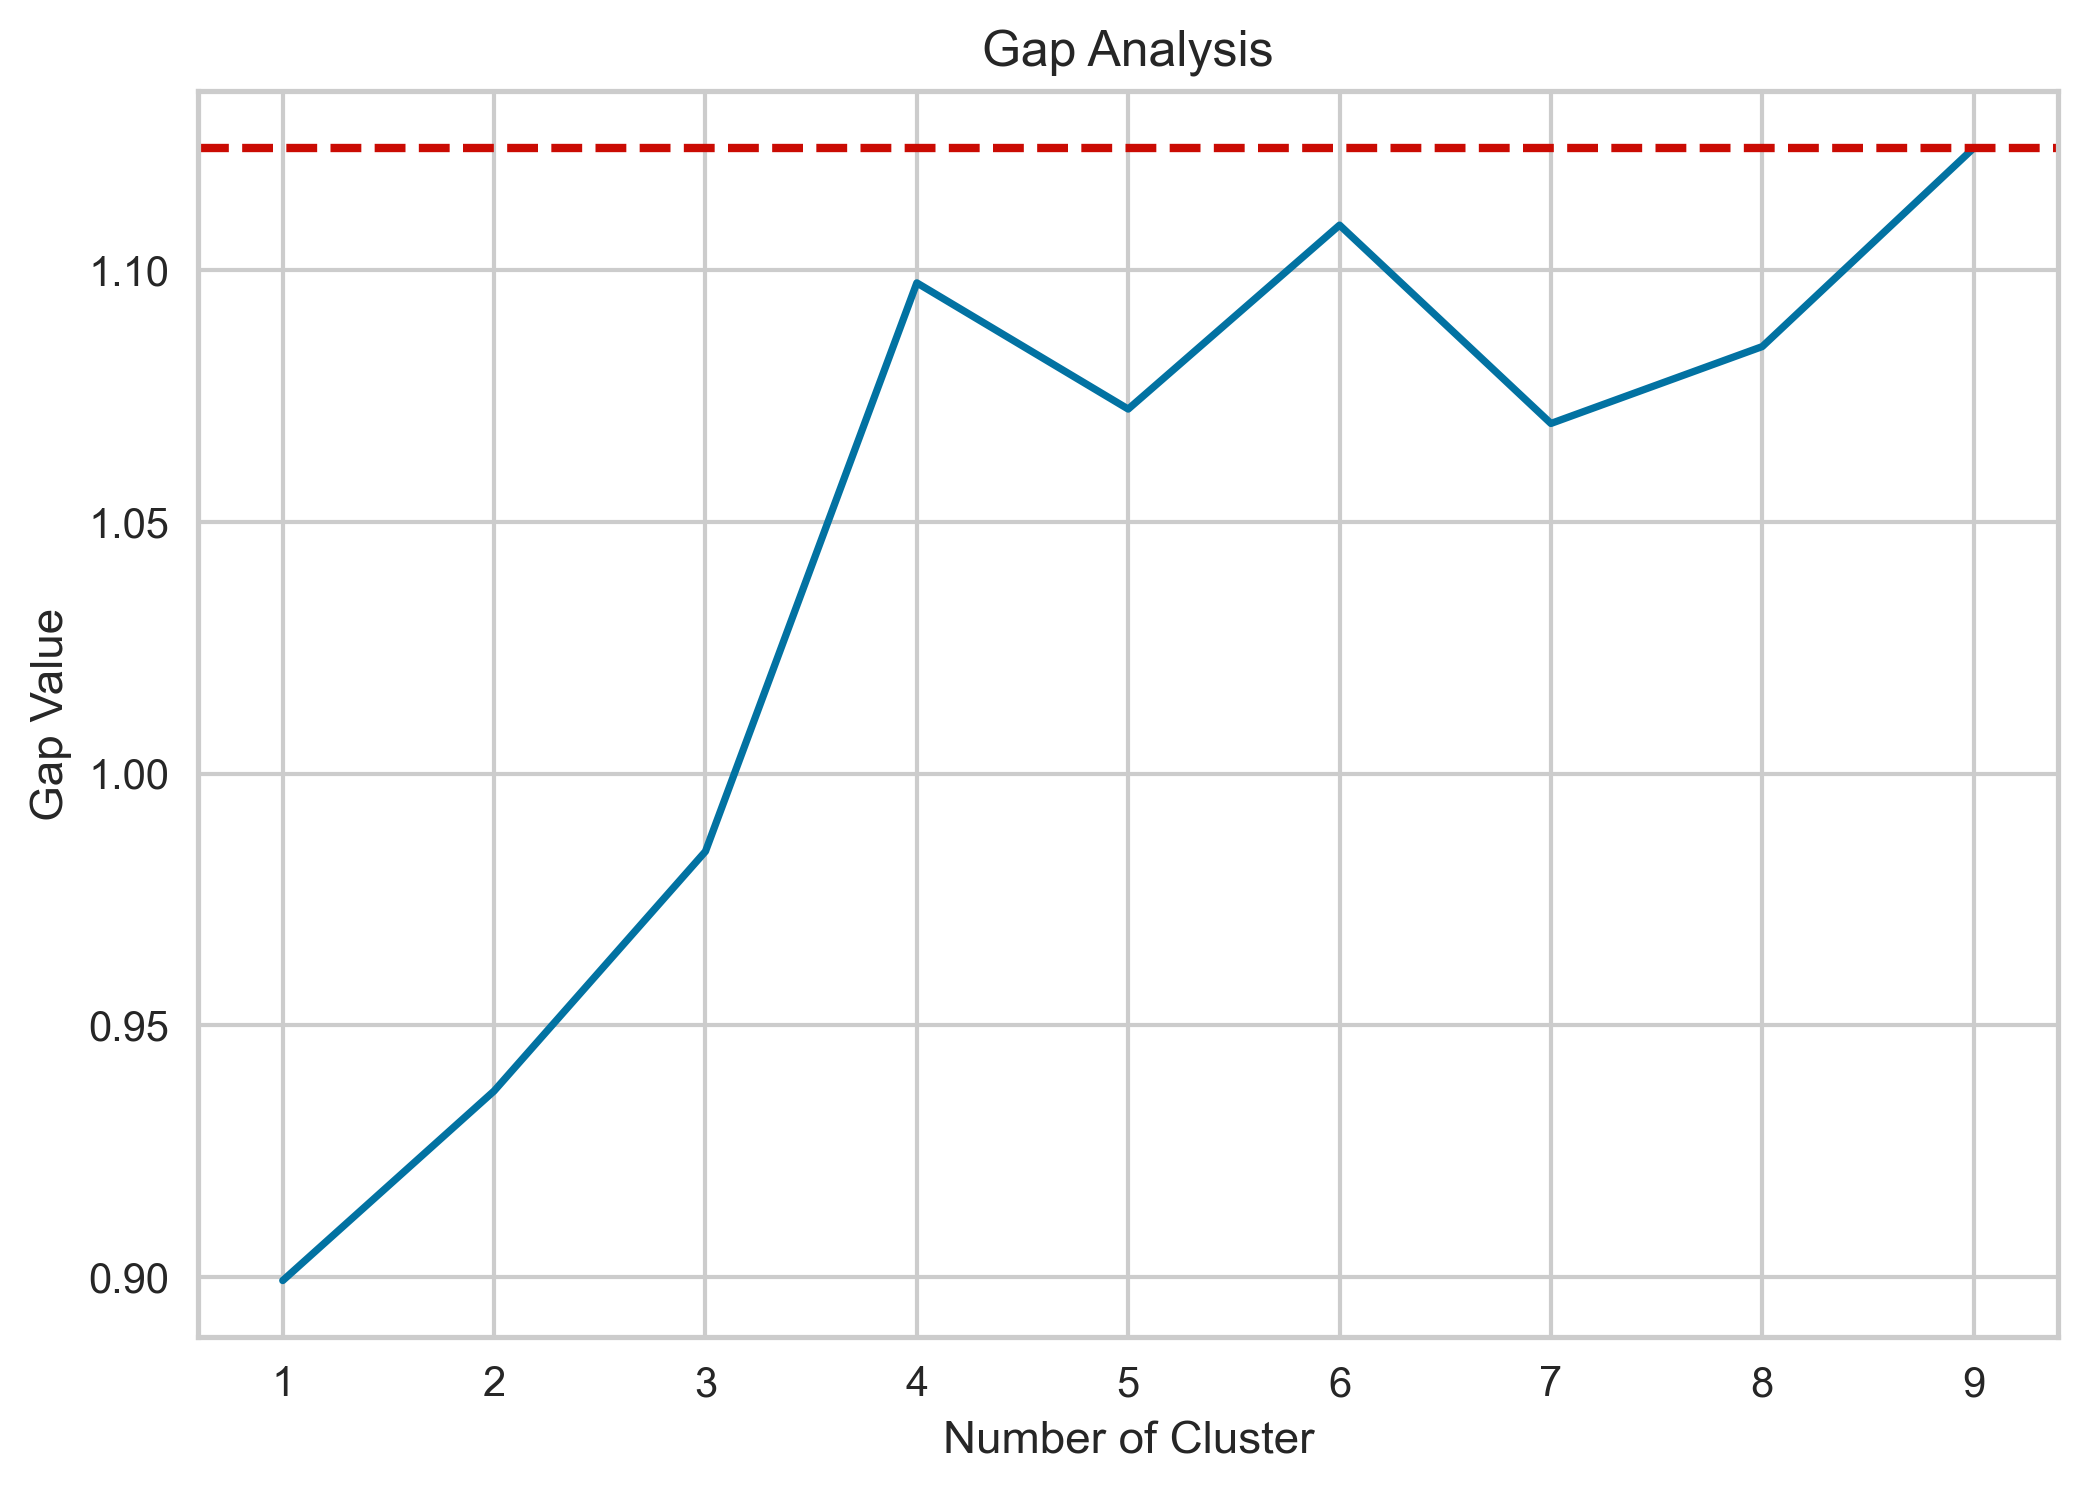

In [33]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r',
            linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_credit)

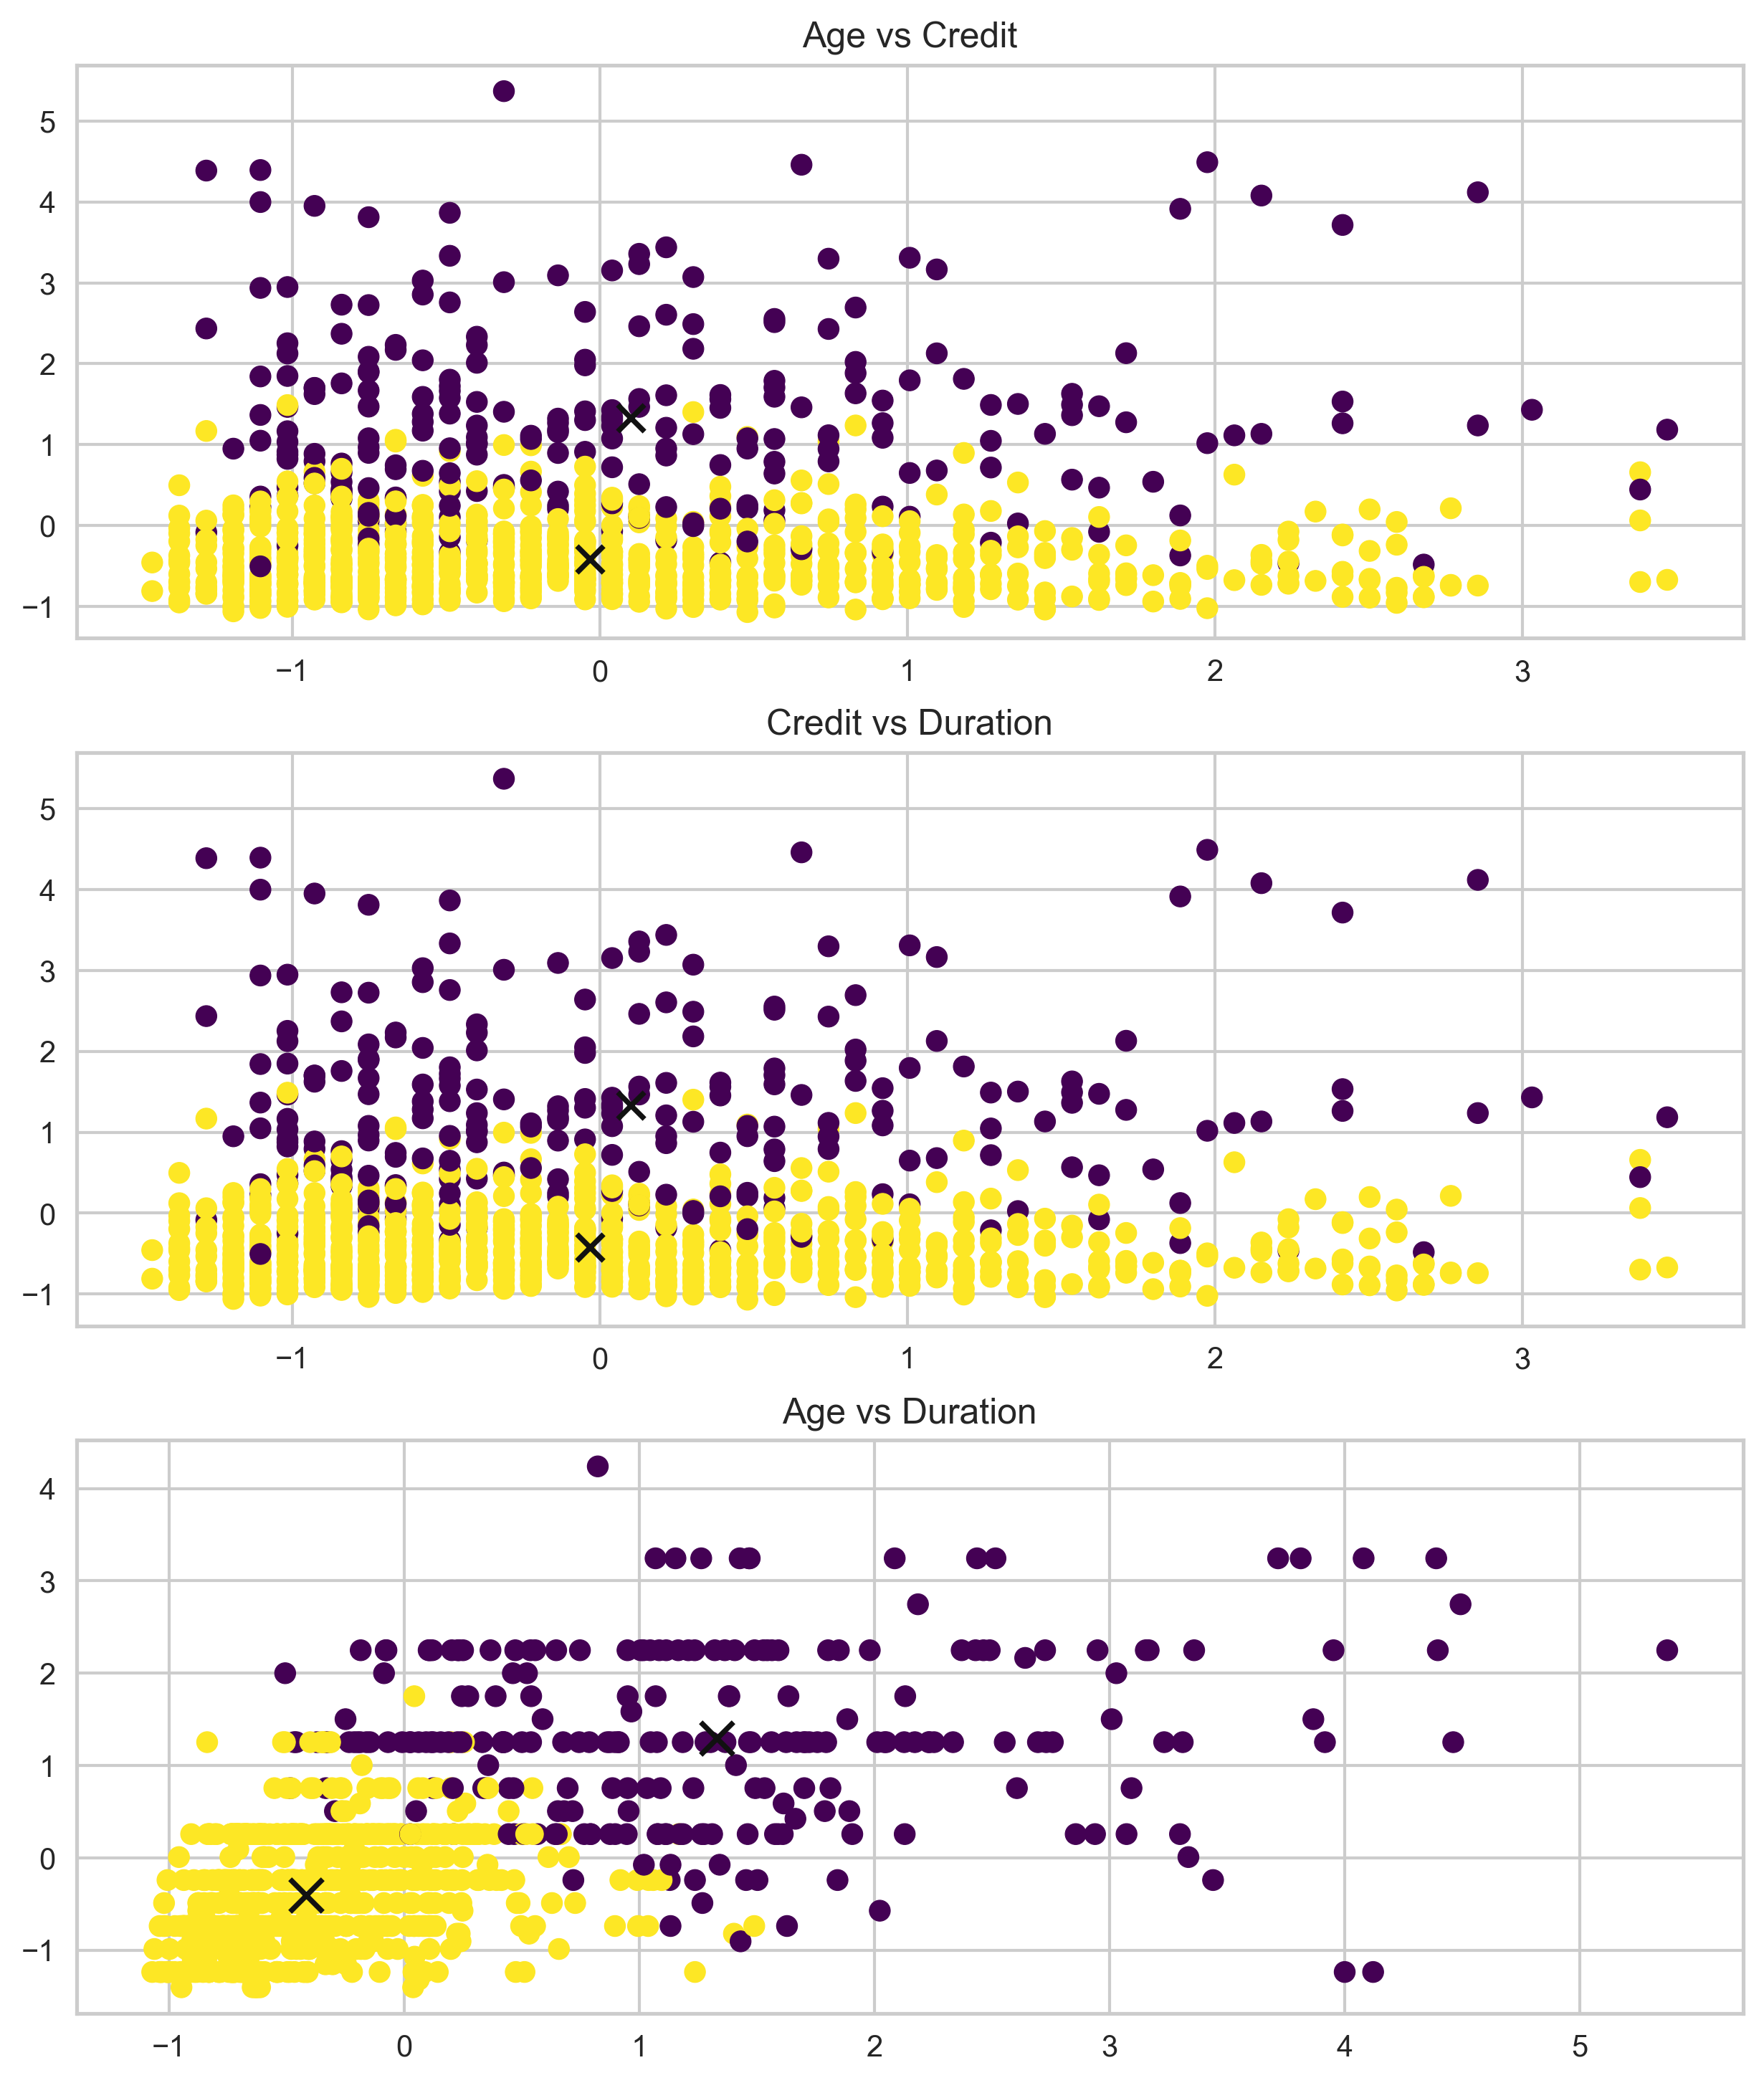

In [35]:
plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 2], s = 80,
            marker= 'x', color = 'k')
plt.title('Age vs Credit')
plt.subplot(312)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 2], s = 80,
            marker= 'x', color = 'k')
plt.title('Credit vs Duration')
plt.subplot(313)
plt.scatter(scaled_credit[:, 2], scaled_credit[:, 3],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2],
            kmeans.cluster_centers_[:, 3], s = 120,
            marker= 'x', color = 'k')
plt.title('Age vs Duration')
plt.show()

In [36]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True)

In [37]:
cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = scaled_credit[np.where(kmeans.labels_==i)]

In [38]:
credit['clusters'] = pd.DataFrame(kmeans.labels_)

In [39]:
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = credit['clusters']

In [40]:
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit amount',
                     'Duration', 'Clusters', 'Risk']

In [41]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()

good    131
bad     108
Name: Risk, dtype: int64

In [42]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()

good    569
bad     192
Name: Risk, dtype: int64

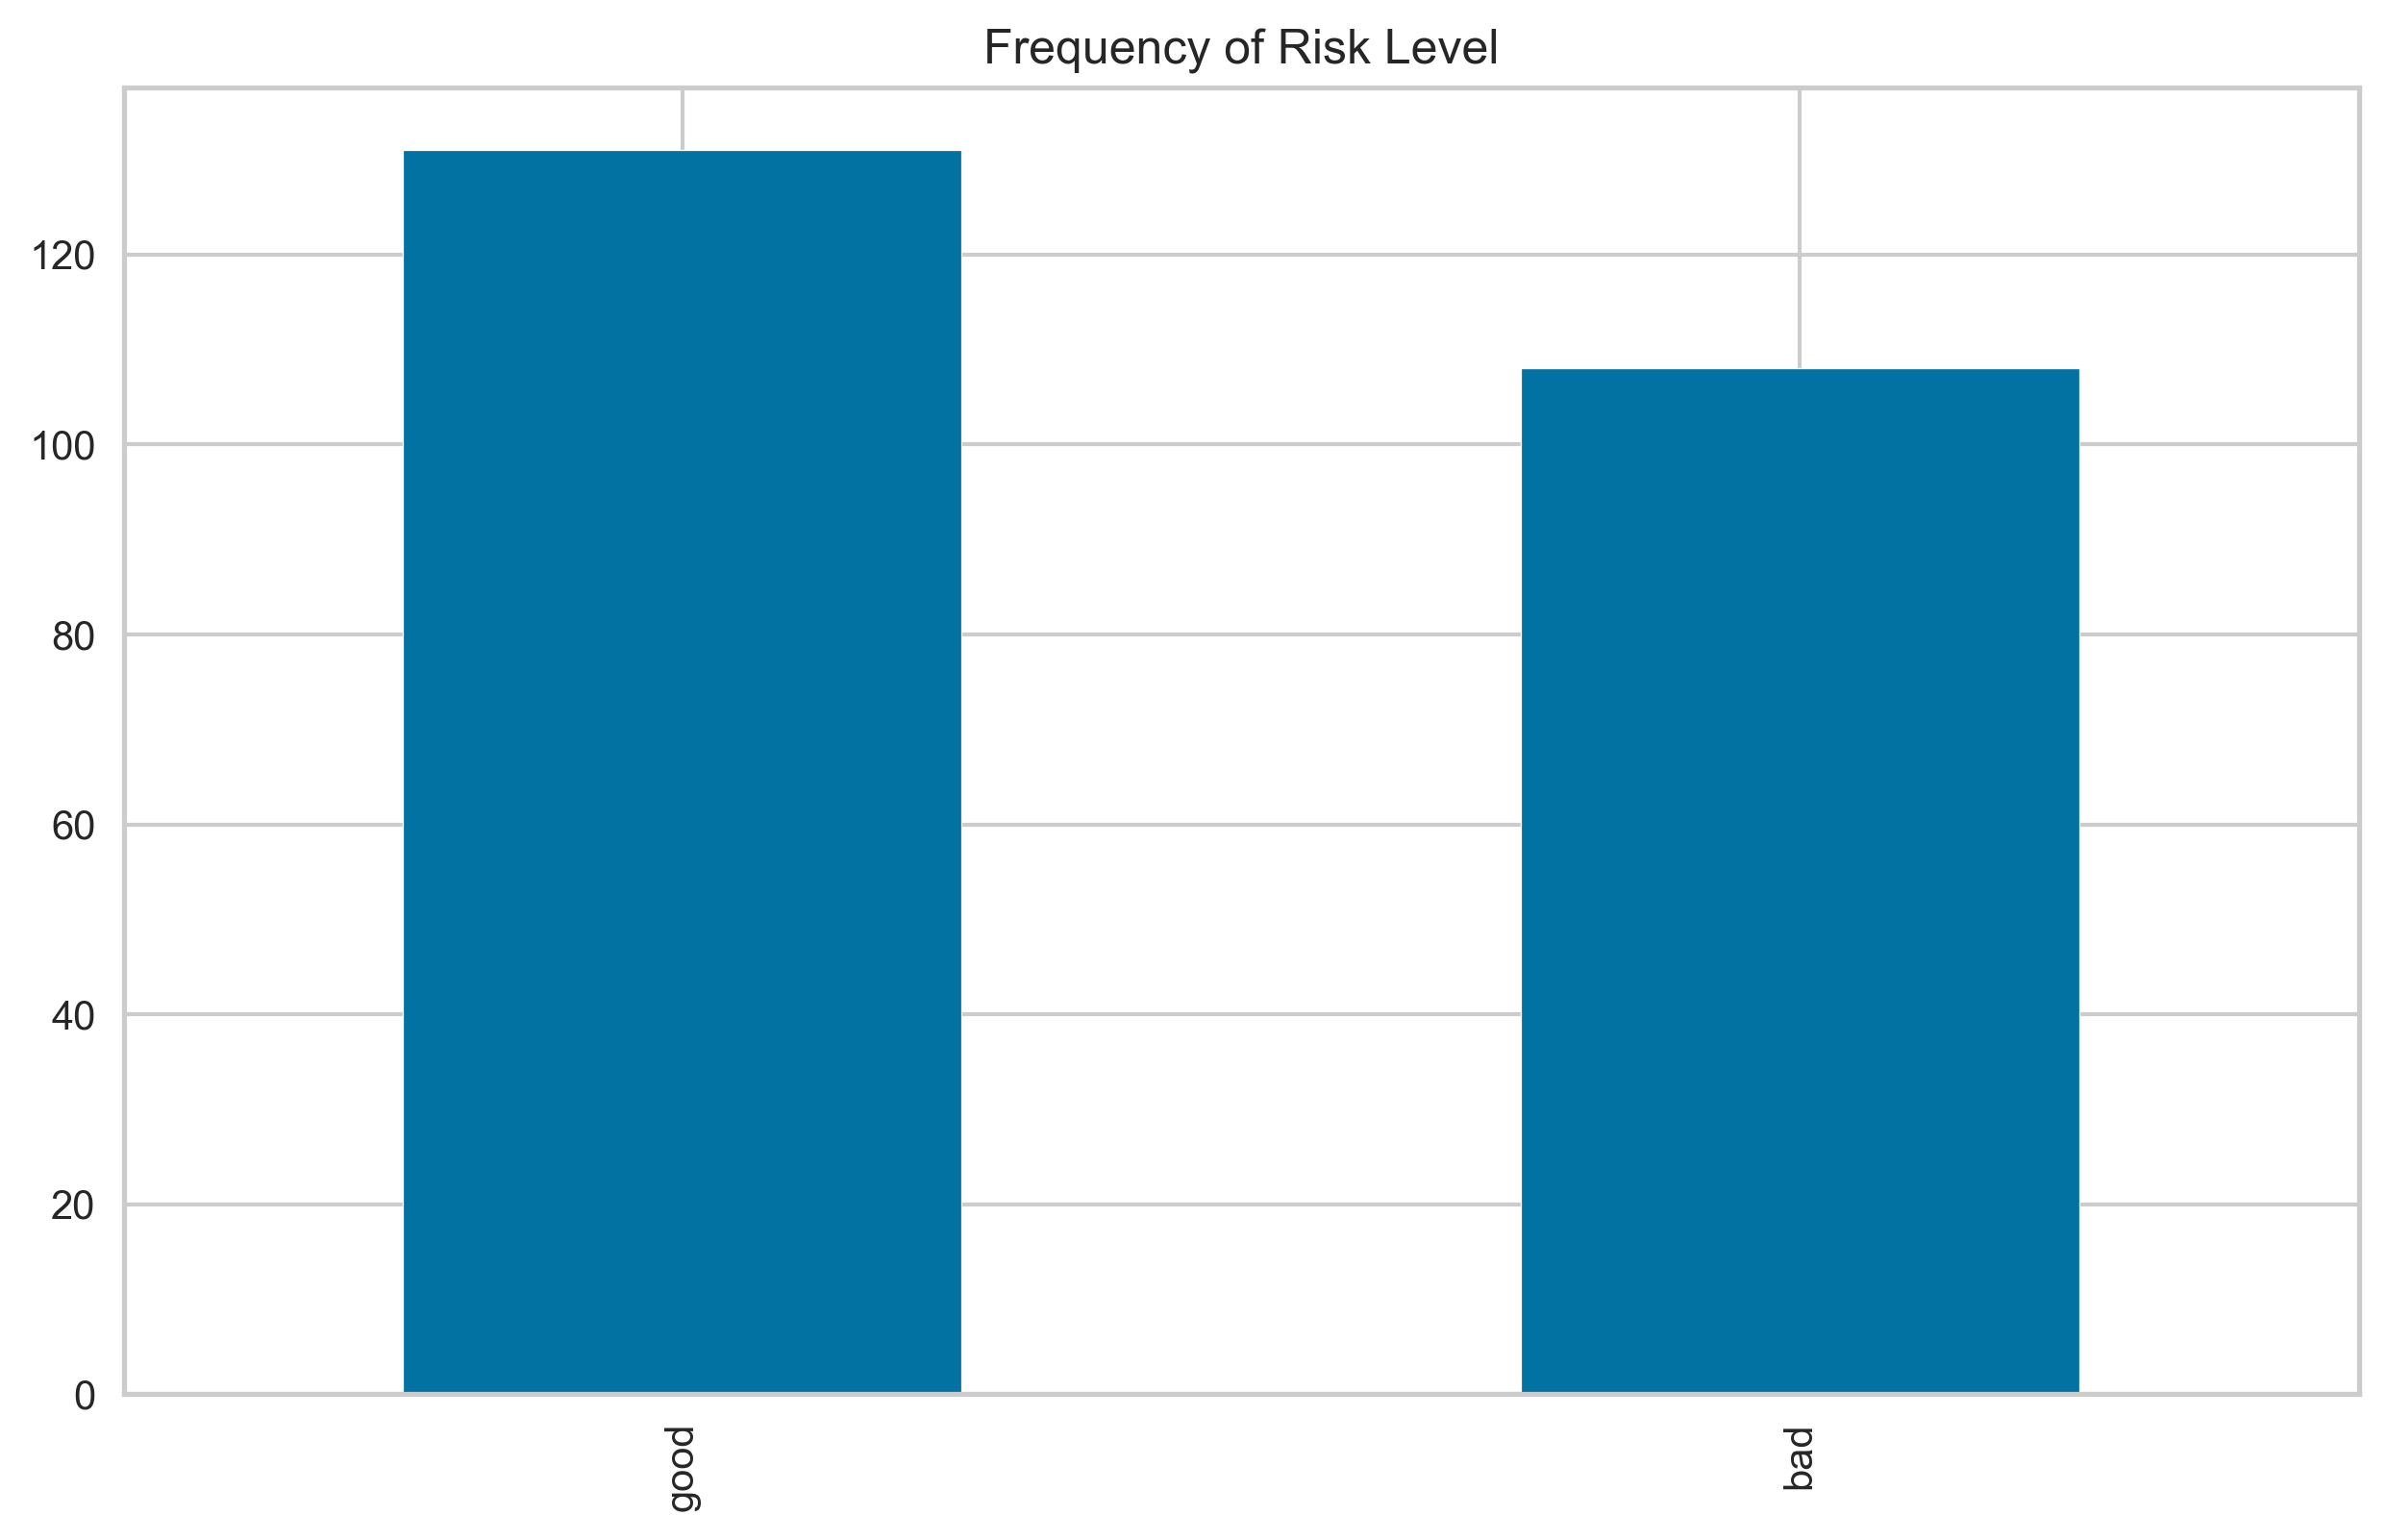

In [43]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()\
                                    .plot(kind='bar',
                                    figsize=(10, 6),
                                    title="Frequency of Risk Level")
plt.show()

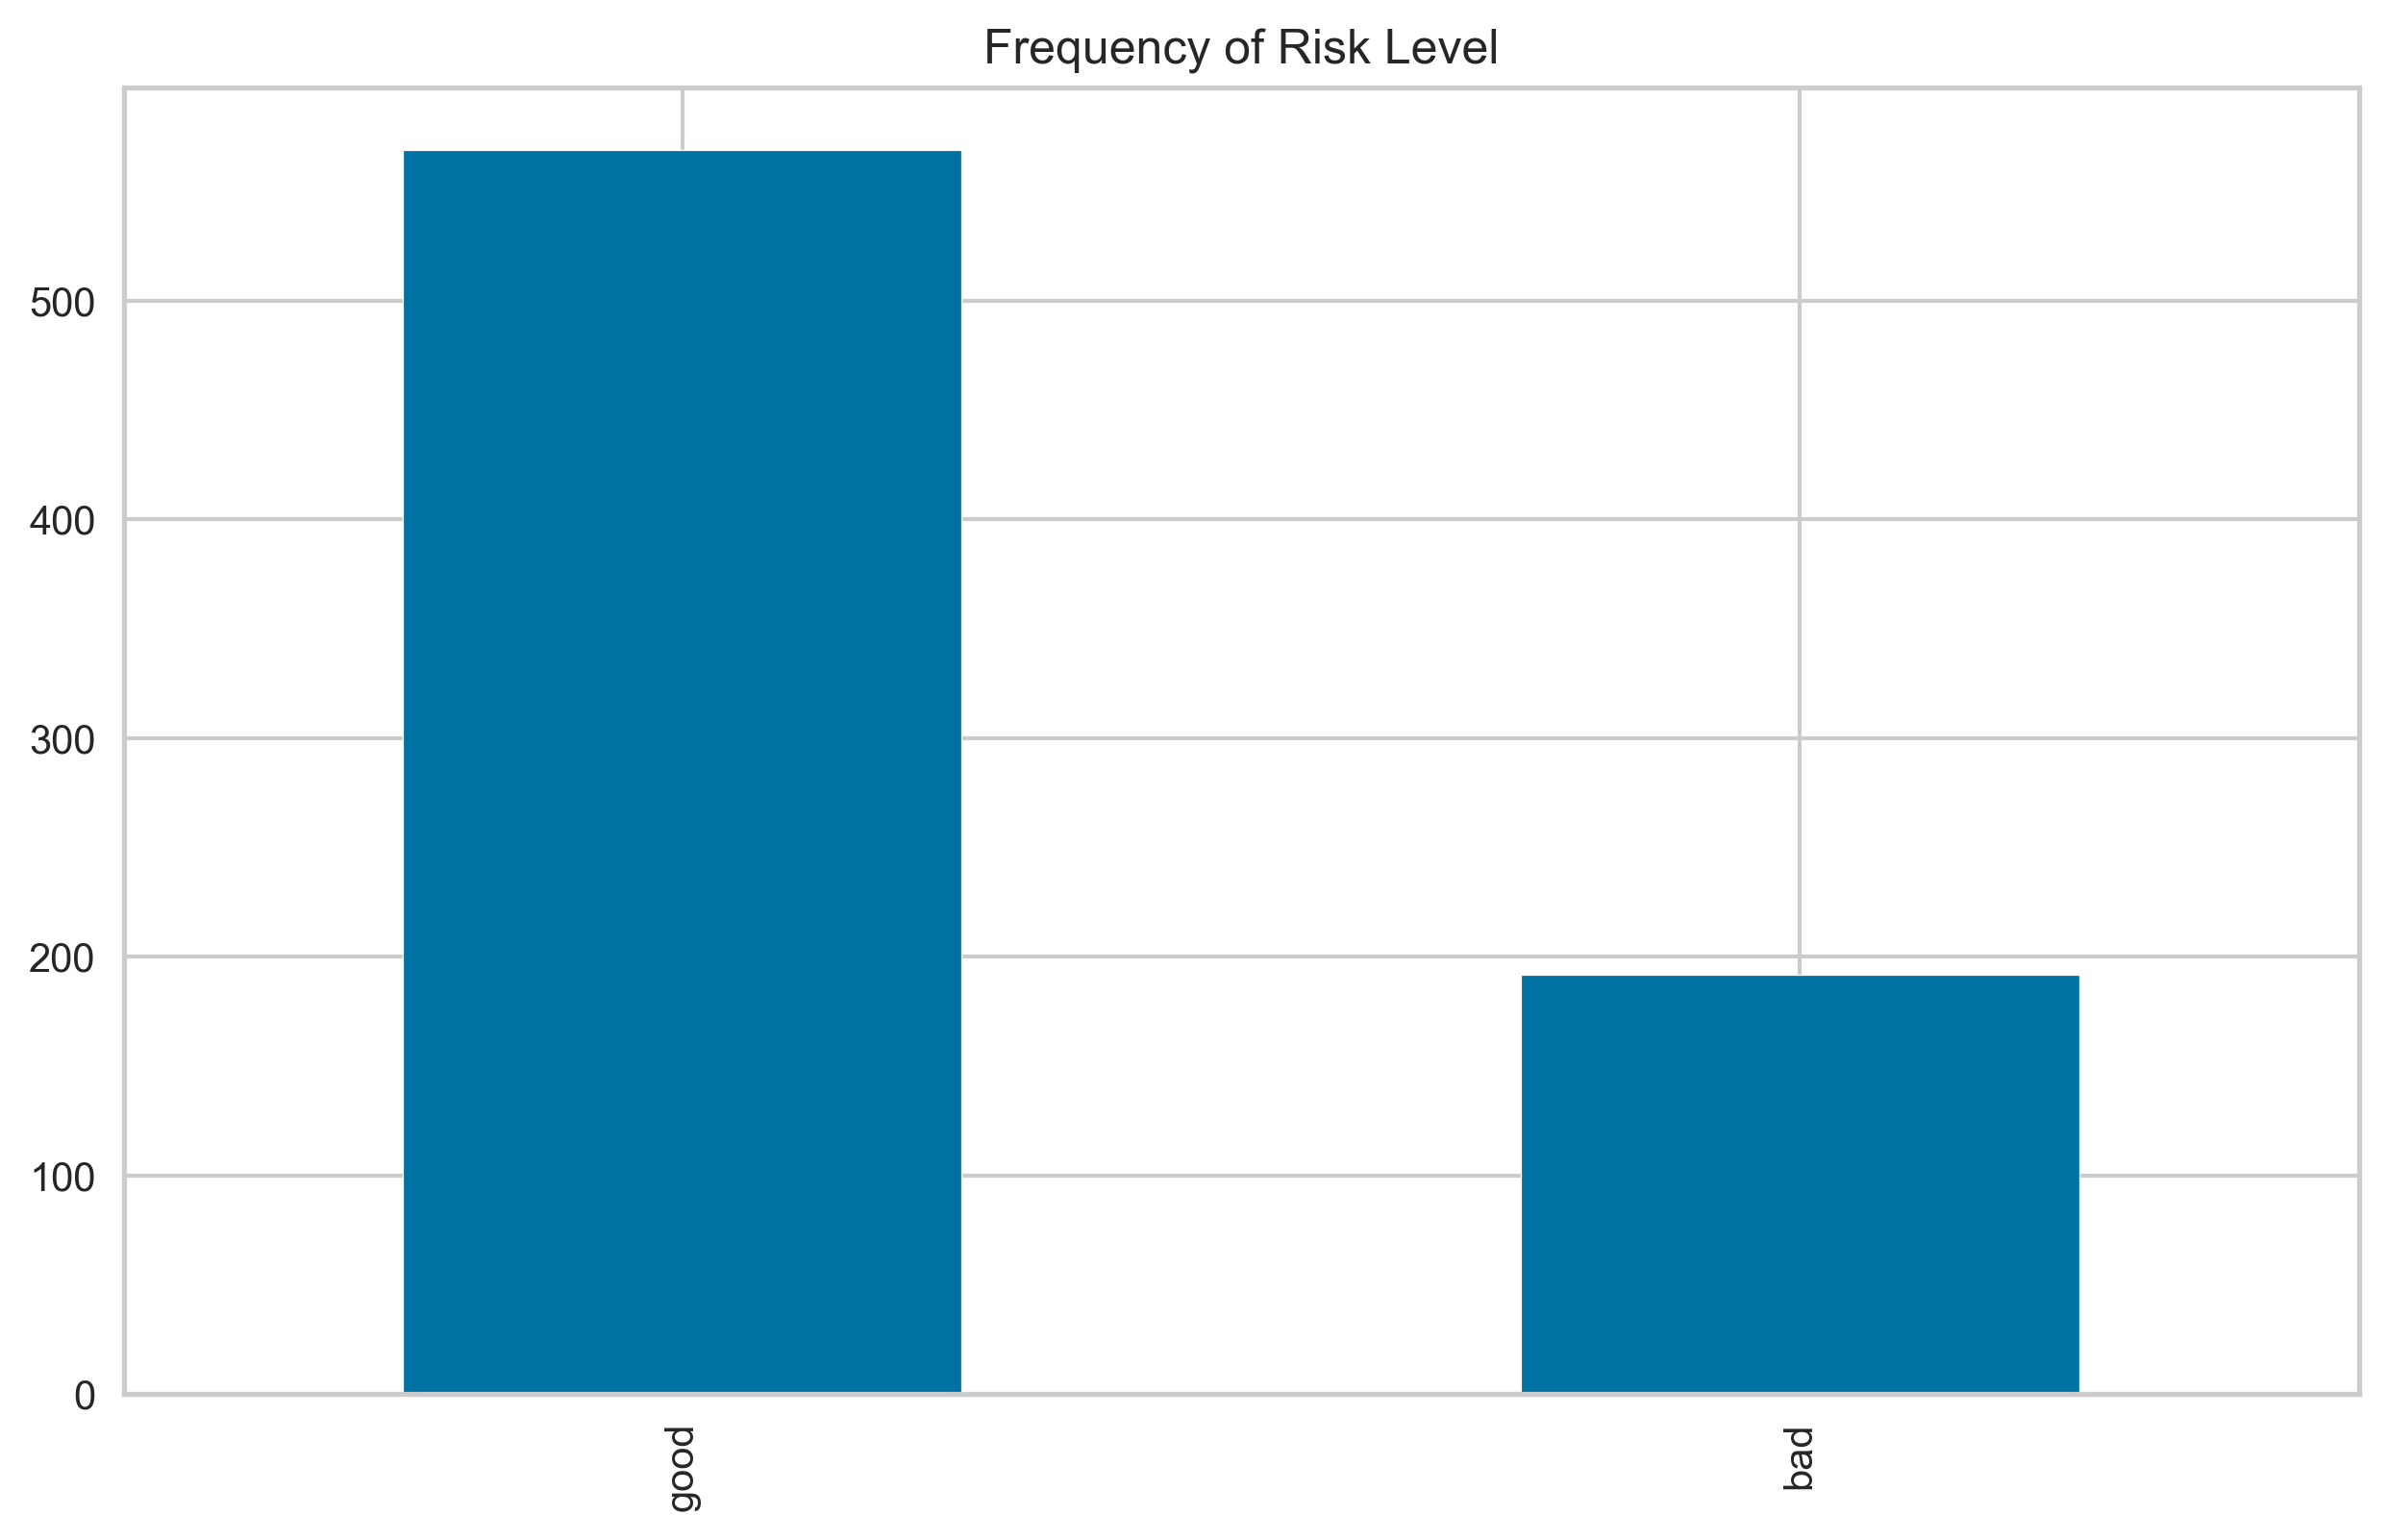

In [44]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()\
                                    .plot(kind='bar',
                                    figsize=(10, 6),
                                    title="Frequency of Risk Level")
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})

In [47]:
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:, ['Risk', 'Clusters']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [49]:
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]

In [52]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 7.7 MB/s eta 0:00:0000:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


## Logistic Regression for PD Estimation

In [53]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

In [54]:
X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters == 0]['Risk']
smote = SMOTEENN(random_state = 2)
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel())
logit = sm.Logit(y_train1, X_train1)
logit_fit1 = logit.fit()
print(logit_fit1.summary())

Optimization terminated successfully.
         Current function value: 0.660941
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   51
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                 0.04620
Time:                        01:13:49   Log-Likelihood:                -33.708
converged:                       True   LL-Null:                       -35.341
Covariance Type:            nonrobust   LLR p-value:                    0.3525
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.0388      0.275      0.141      0.888      -0.501       0.578
Job               0.

In [55]:
first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]

In [56]:
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters == 0]['Risk']
pred_prob1 = logit_fit1.predict(X_test1)

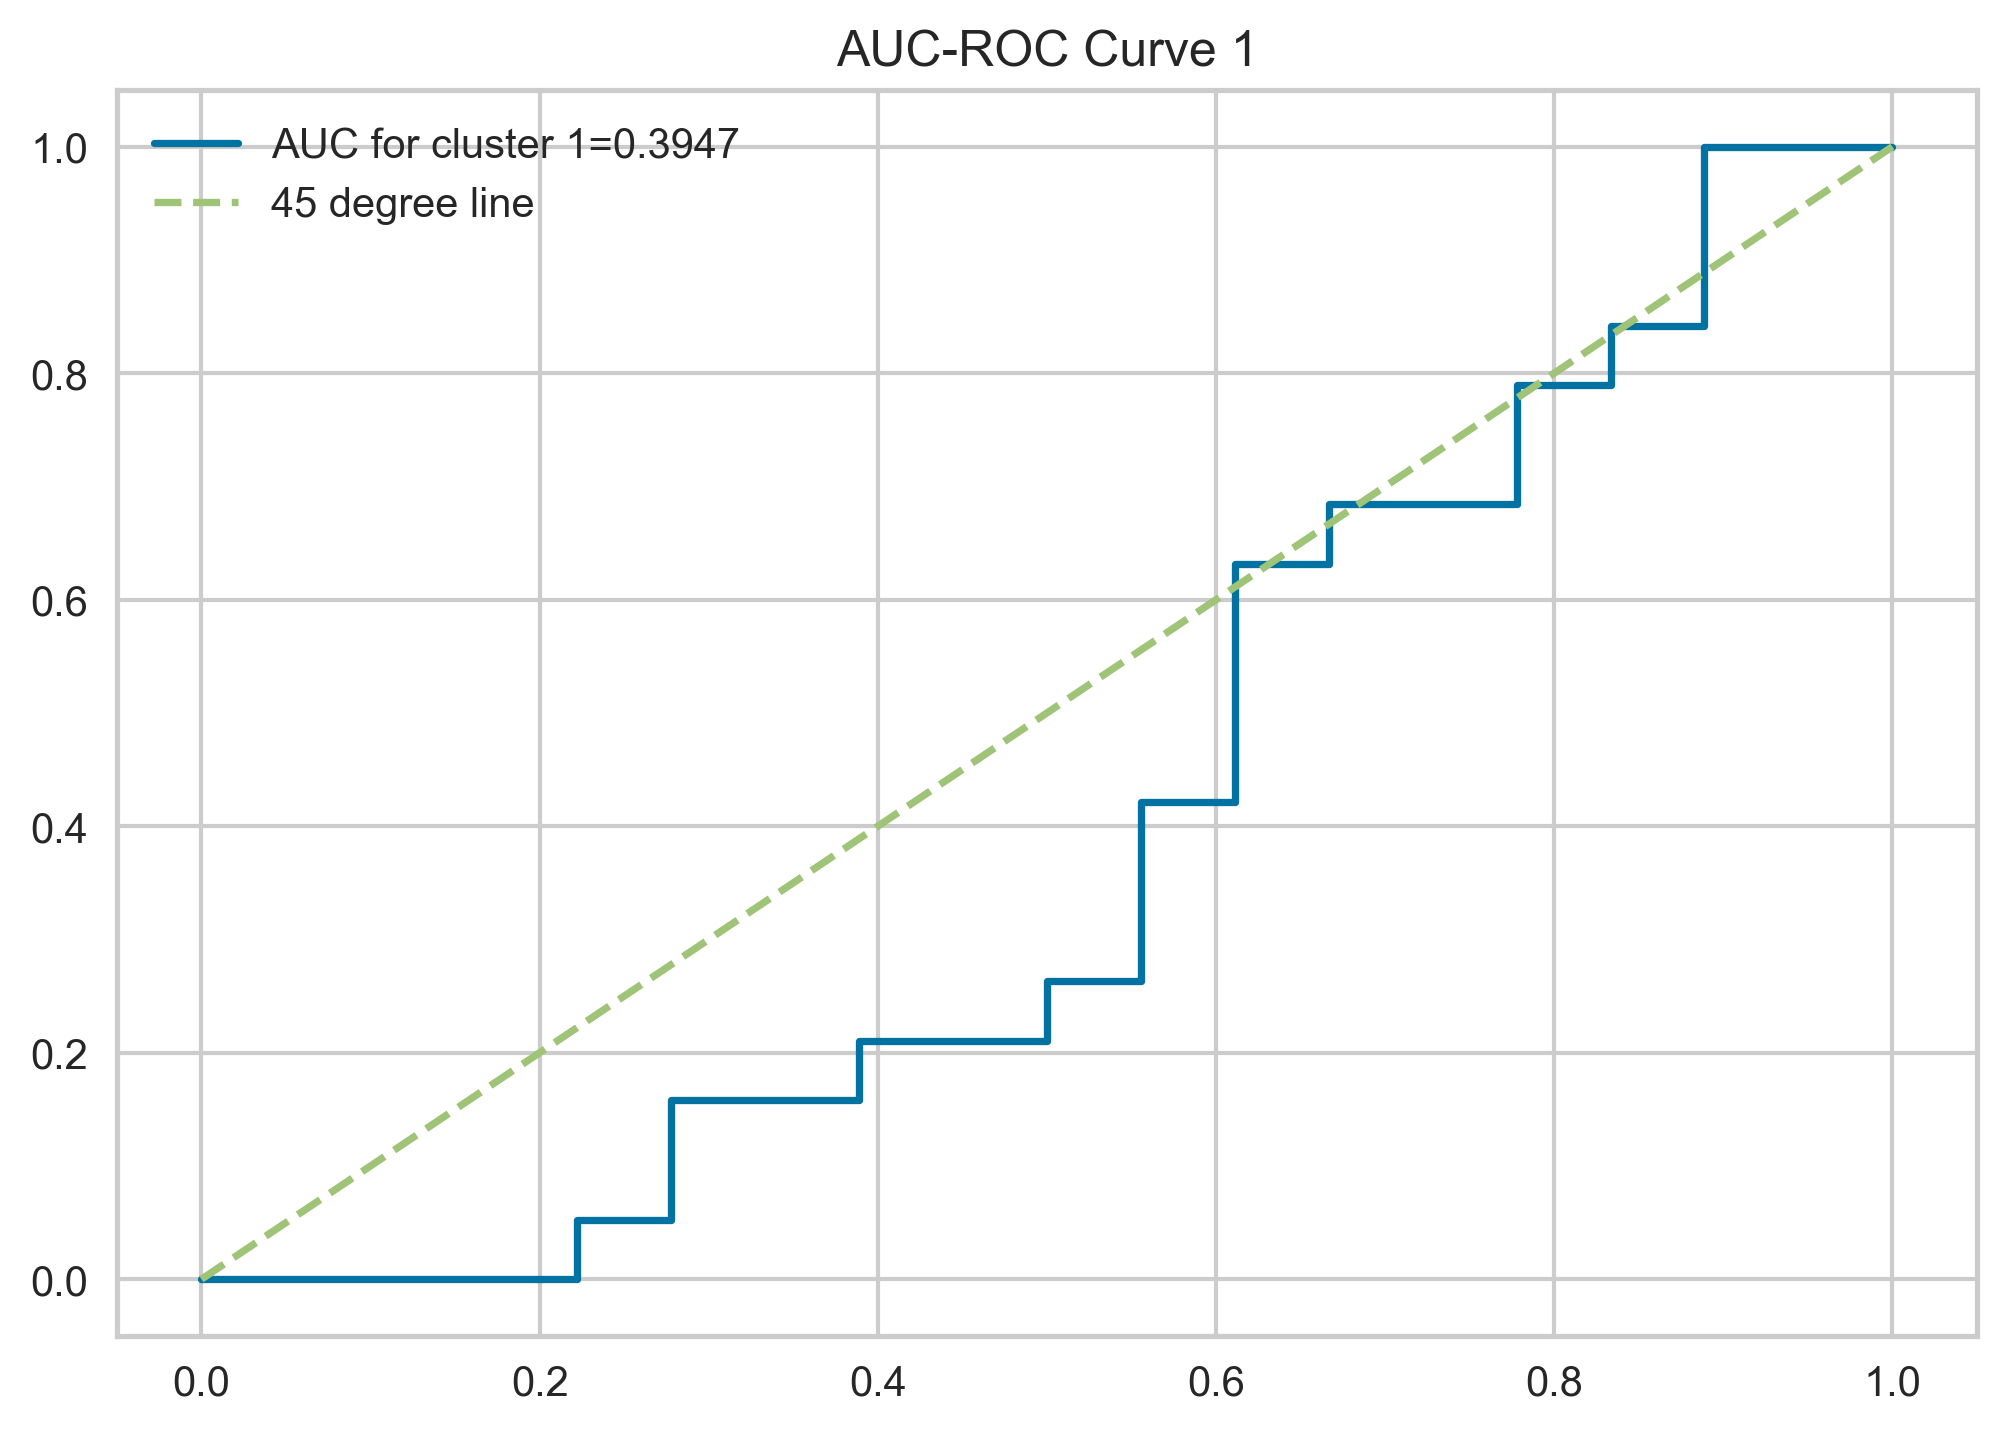

In [57]:
false_pos, true_pos, _ = roc_curve(y_test1.values,  pred_prob1)
auc = roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos,true_pos, label="AUC for cluster 1={:.4f} "
         .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve 1')
plt.show()

In [58]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters == 1]['Risk']
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
print(logit_fit2.summary())

Optimization terminated successfully.
         Current function value: 0.598744
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  598
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                -0.05959
Time:                        01:13:58   Log-Likelihood:                -358.05
converged:                       True   LL-Null:                       -337.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.3858      0.099      3.896      0.000       0.192       0.580
Job              -0.

In [59]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters == 1]['Risk']
pred_prob2 = logit_fit2.predict(X_test2)

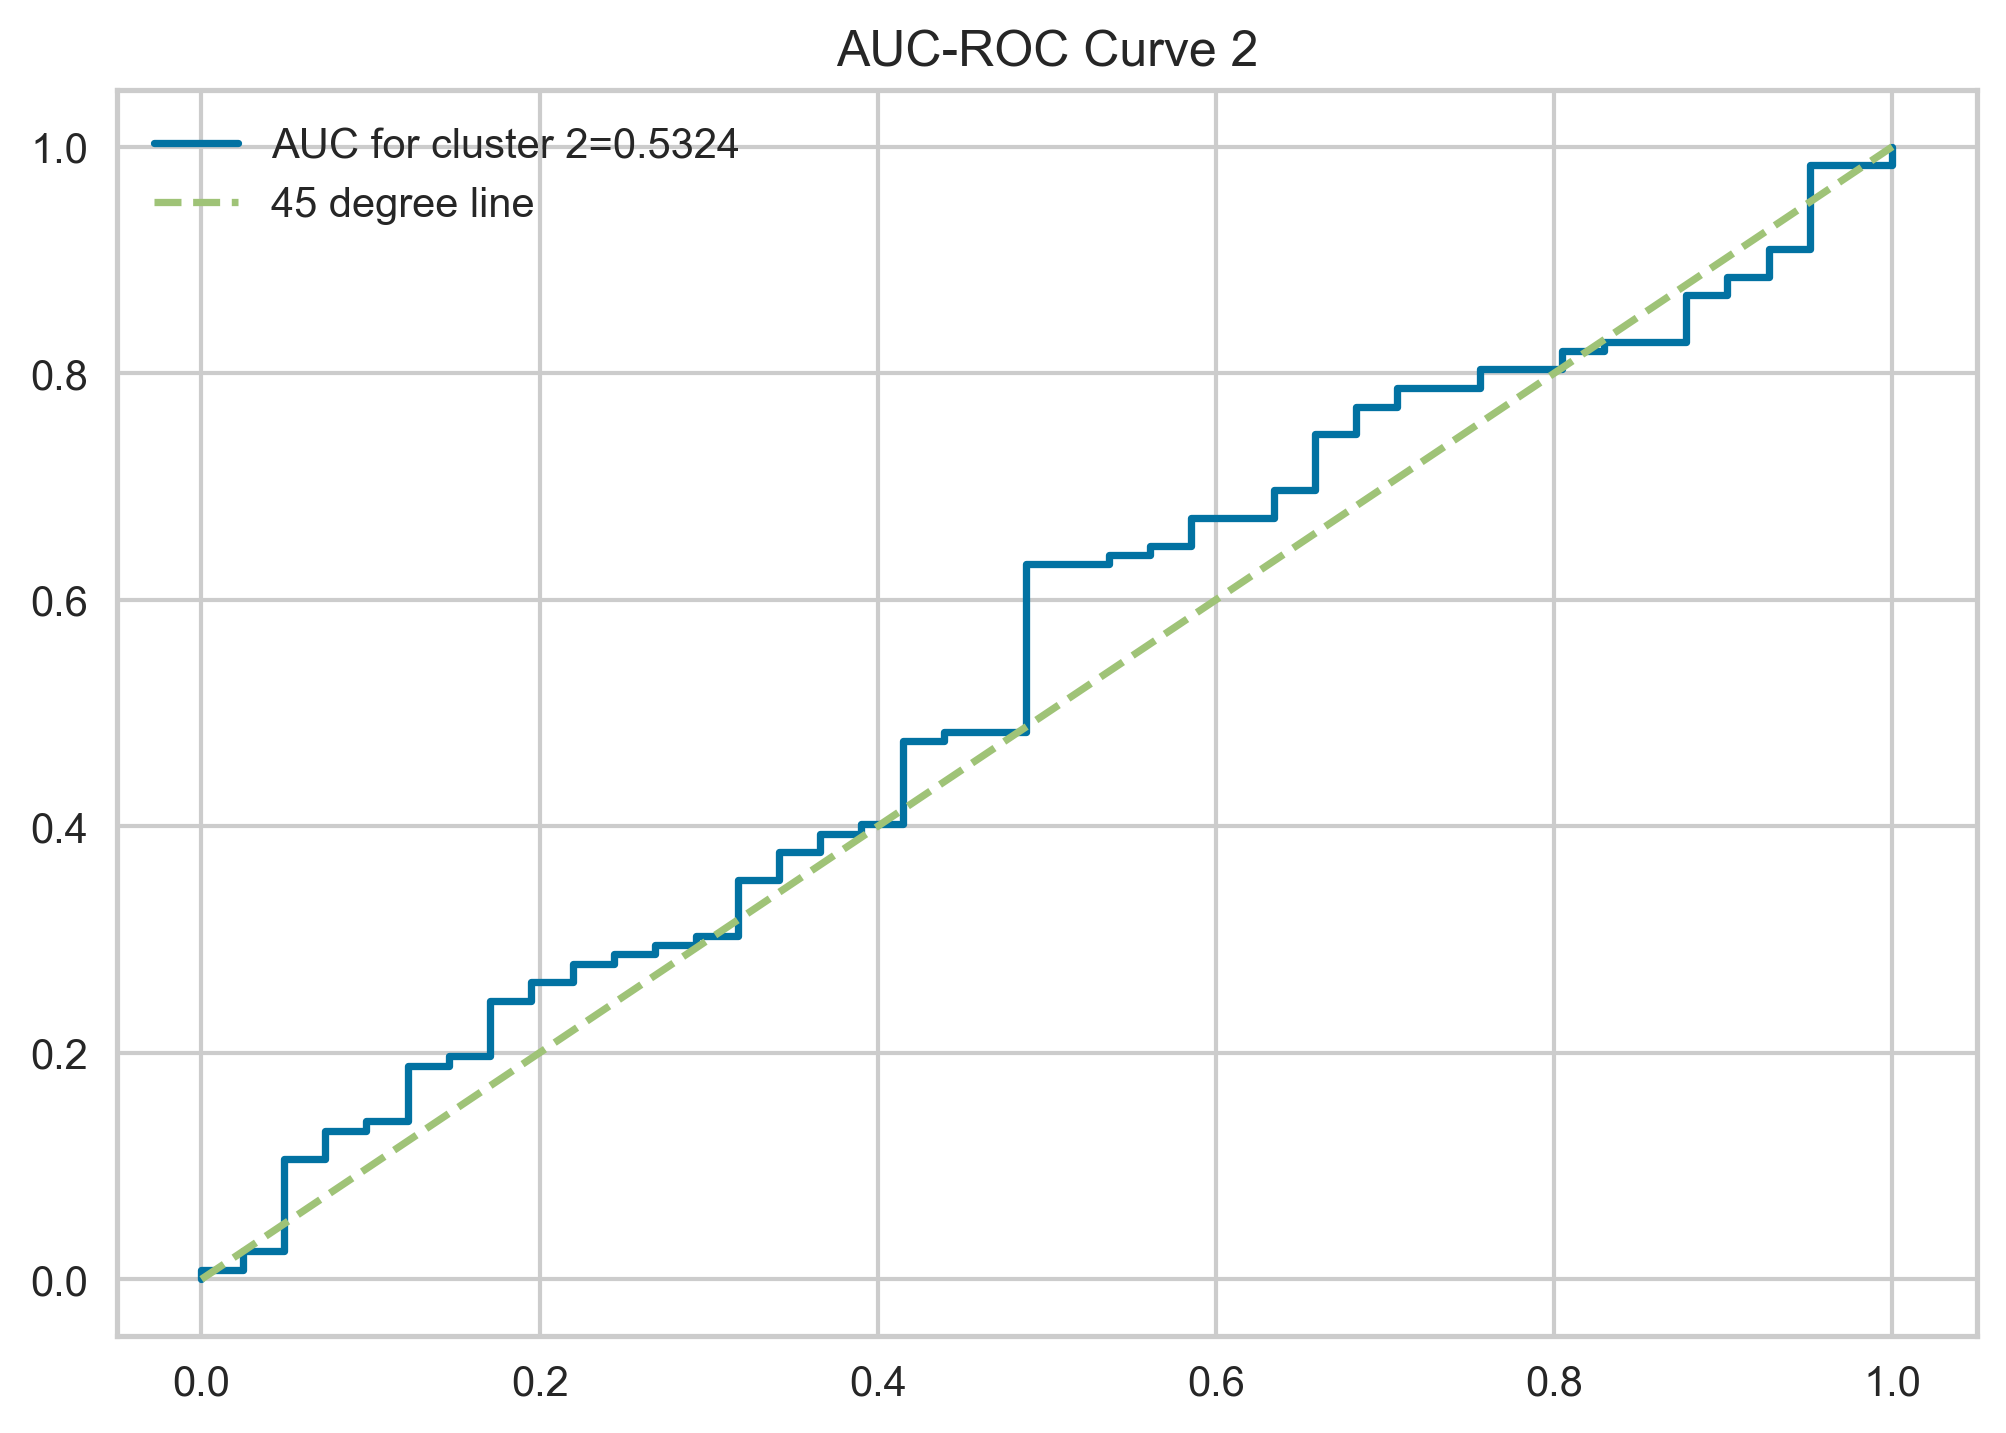

In [60]:
false_pos, true_pos, _ = roc_curve(y_test2.values,  pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos,true_pos,label="AUC for cluster 2={:.4f} "
         .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve 2')
plt.show()

## Bayesian Approach for PD Estimation

In [67]:
#pip install pymc3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 17.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 9.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.0/970.0 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.6/260.6 kB 9.9 MB/s eta 0:00:00
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529964 sha256=e28f3fd7b7e872e152d89278ab2a5e00716e25a5ff96a717ea2801ebe8f9278f
  Stored in directory: /Users/rz/Li

In [68]:
#pip install arviz

Note: you may need to restart the kernel to use updated packages.


In [69]:
import pymc3 as pm 
import arviz as az

In [71]:
with pm.Model() as logistic_model1:
    beta_age = pm.Normal('coeff_age', mu=0, sd=10)
    beta_job = pm.Normal('coeff_job', mu=0, sd=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sd=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sd=10)
    p = pm.Deterministic('p', pm.math.sigmoid(beta_age * 
                              X_train1['Age'] + beta_job *
                              X_train1['Job'] + beta_credit *
                              X_train1['Credit amount'] + beta_dur *
                              X_train1['Duration']))
with logistic_model1:
    observed = pm.Bernoulli("risk", p, observed=y_train1)
    map_estimate = pm.find_MAP()

In [72]:
param_list = ['coeff_age', 'coeff_job',
              'coeff_credit_amount', 'coeff_duration']
params = {}
for i in param_list:
    params[i] = [np.round(map_estimate[i], 6)] 
    
bayesian_params = pd.DataFrame.from_dict(params)    
print('The result of Bayesian estimation:\n {}'.format(bayesian_params))

The result of Bayesian estimation:
    coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0   0.038938   0.336902            -0.439587        0.307461


In [73]:
with pm.Model() as logistic_model2:
    beta_age = pm.Normal('coeff_age', mu=0, sd=10)
    beta_job = pm.Normal('coeff_job', mu=0, sd=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sd=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sd=10)
    p = pm.Deterministic('p', pm.math.sigmoid(beta_age *
                              second_cluster_train['Age'] + 
                              beta_job * second_cluster_train['Job'] + 
                              beta_credit * second_cluster_train['Credit amount'] + 
                              beta_dur * second_cluster_train['Duration']))
with logistic_model2:
    observed = pm.Bernoulli("risk", p,
                            observed=y_train[y_train.Clusters == 1]
                            ['Risk'])
    map_estimate = pm.find_MAP()

In [74]:
param_list = [ 'coeff_age', 'coeff_job',
              'coeff_credit_amount', 'coeff_duration']
params = {}
for i in param_list:
    params[i] = [np.round(map_estimate[i], 6)]
    
bayesian_params = pd.DataFrame.from_dict(params)    
print('The result of Bayesian estimation:\n {}'.format(bayesian_params))

The result of Bayesian estimation:
    coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0   0.385766  -0.064488            -0.662144       -0.849324


## Markov Chain for PD Estimation

In [75]:
import logging
logger = logging.getLogger('pymc3')
logger.setLevel(logging.ERROR)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


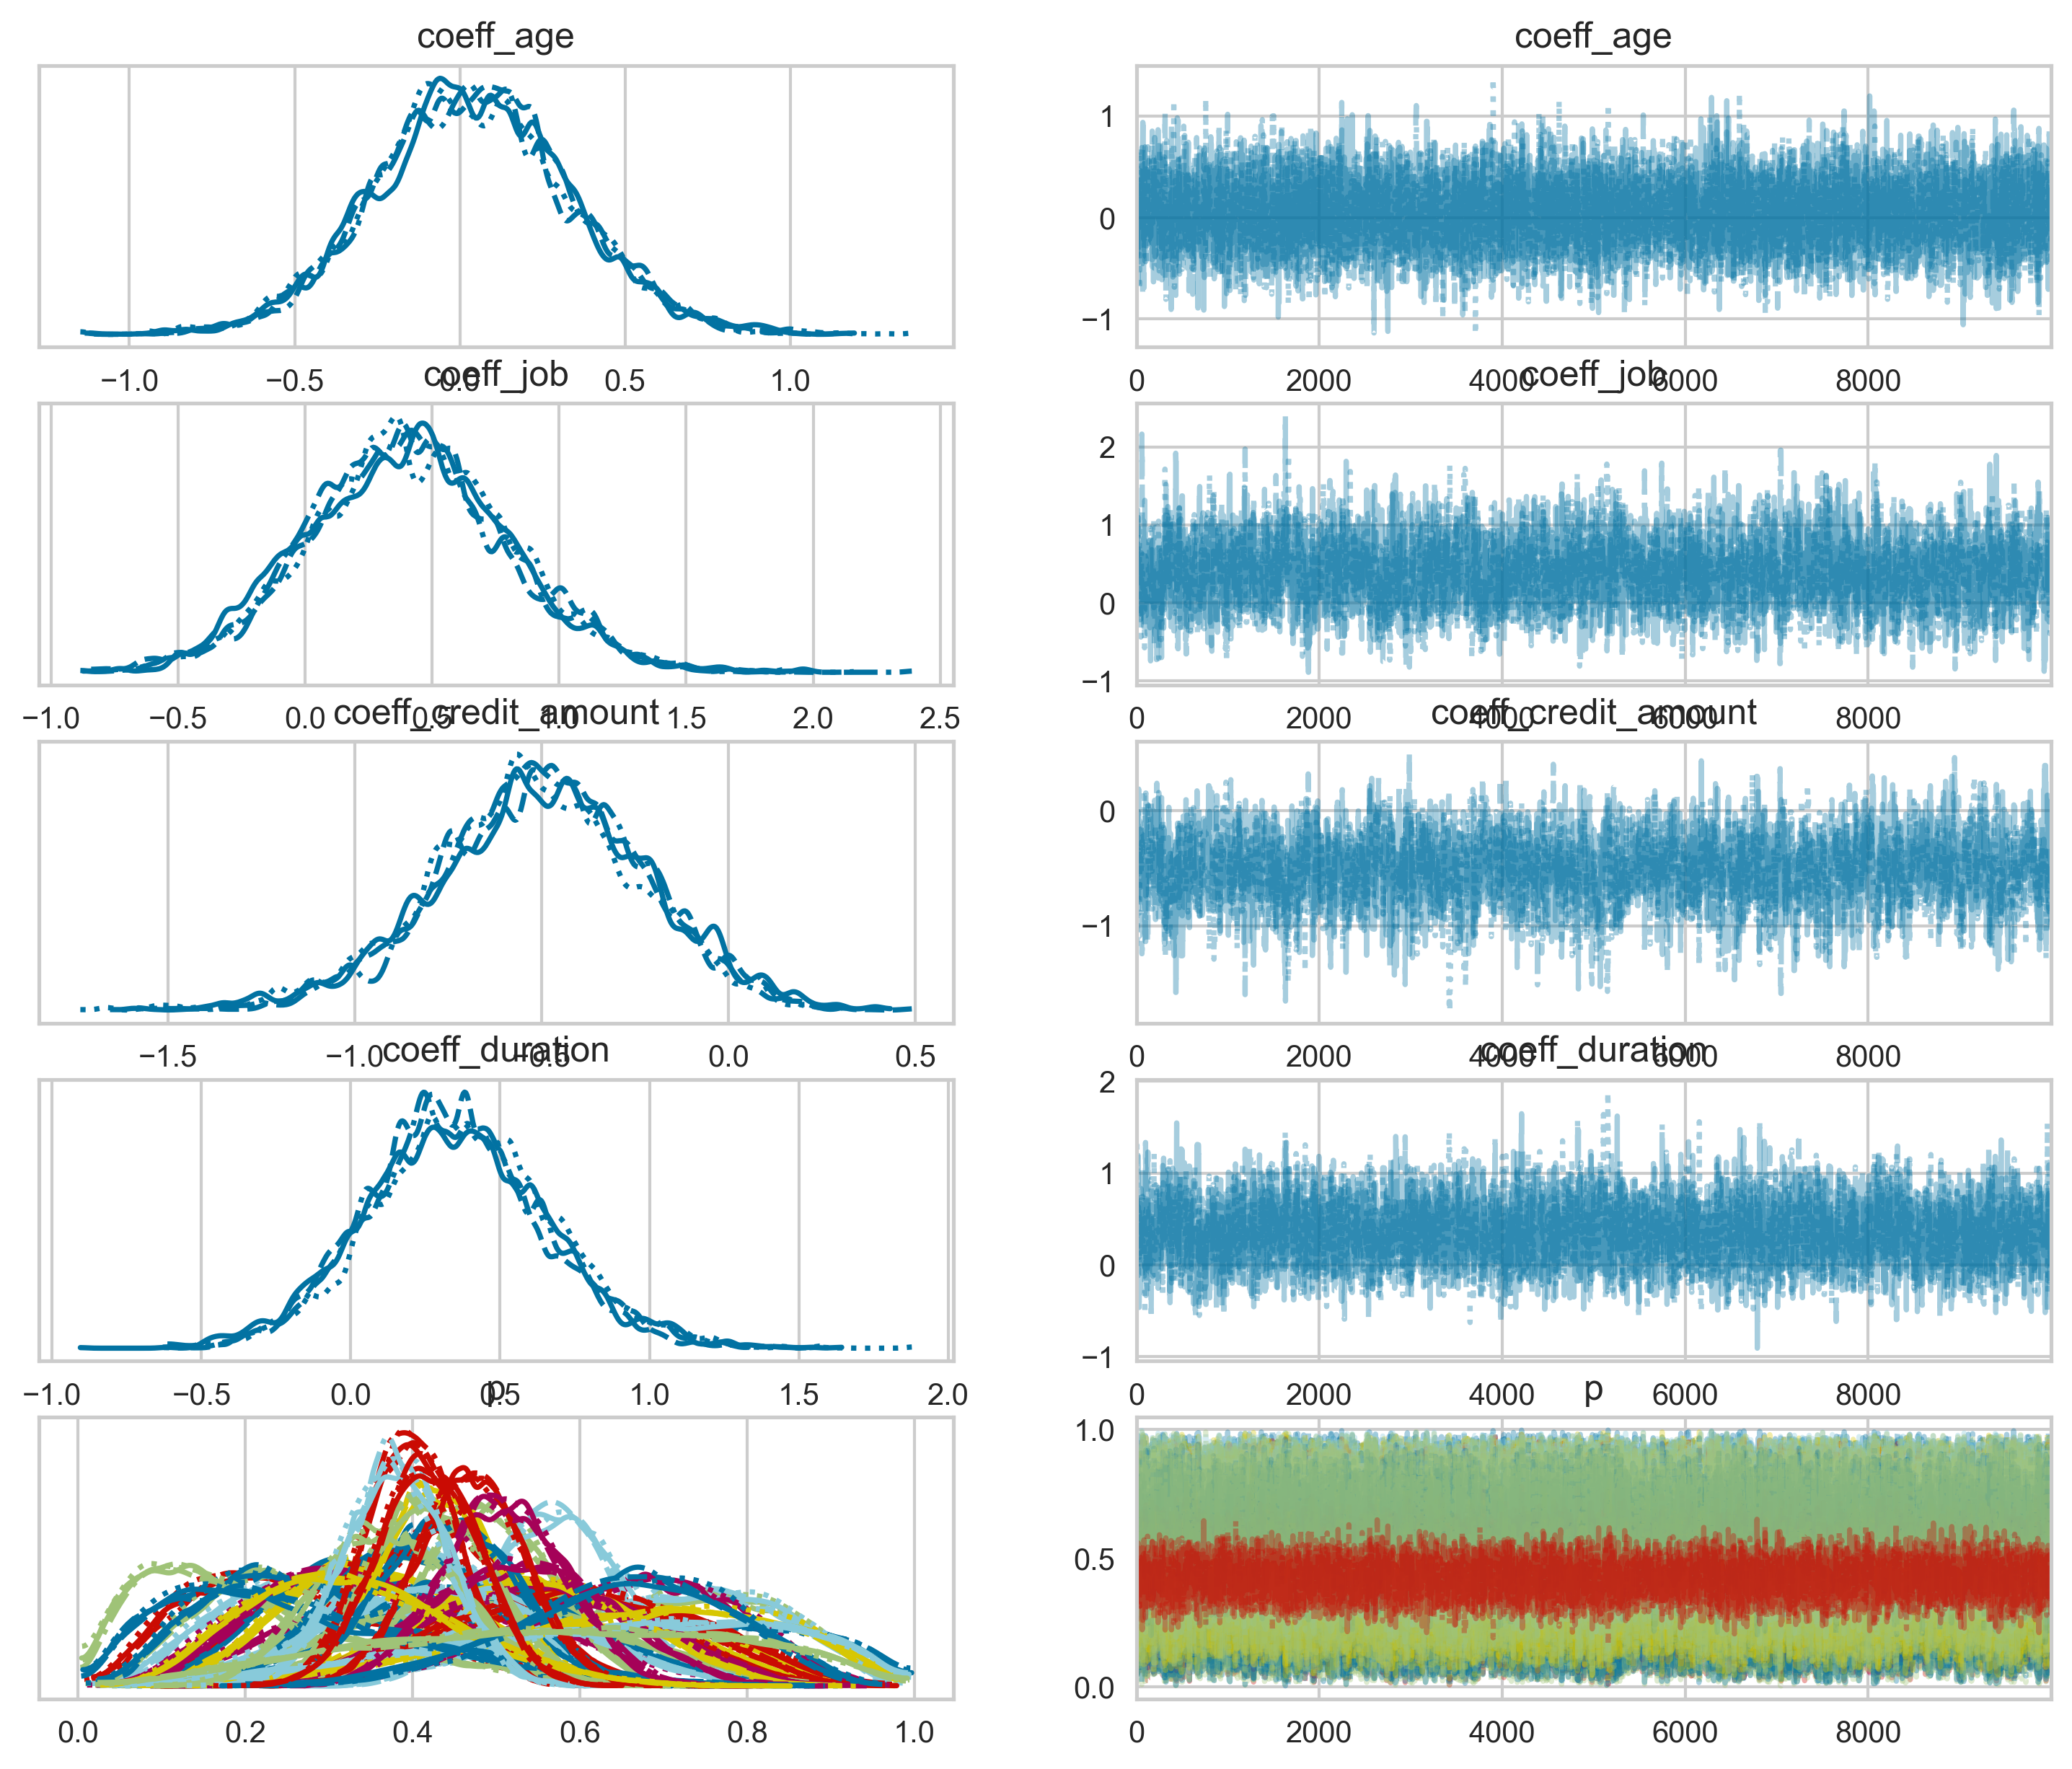

In [76]:
with logistic_model1:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step,progressbar = False)
az.plot_trace(trace)
plt.show()

In [77]:
with logistic_model1:
    display(az.summary(trace, round_to=6)[:4])

mean        sd    hdi_3%   hdi_97%  mcse_mean  \
coeff_age            0.036925  0.296657 -0.512104  0.597256   0.003491   
coeff_job            0.403823  0.393117 -0.327355  1.146141   0.009122   
coeff_credit_amount -0.506850  0.279943 -1.027738  0.026778   0.007172   
coeff_duration       0.354541  0.301365 -0.216452  0.918779   0.005516   

                      mcse_sd     ess_bulk     ess_tail     r_hat  
coeff_age            0.002469  7181.958656  8240.249067  1.000474  
coeff_job            0.006451  1858.726982  3488.475212  1.001379  
coeff_credit_amount  0.005072  1524.101799  2679.032184  1.002482  
coeff_duration       0.003901  2985.842455  5613.412370  1.001910

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


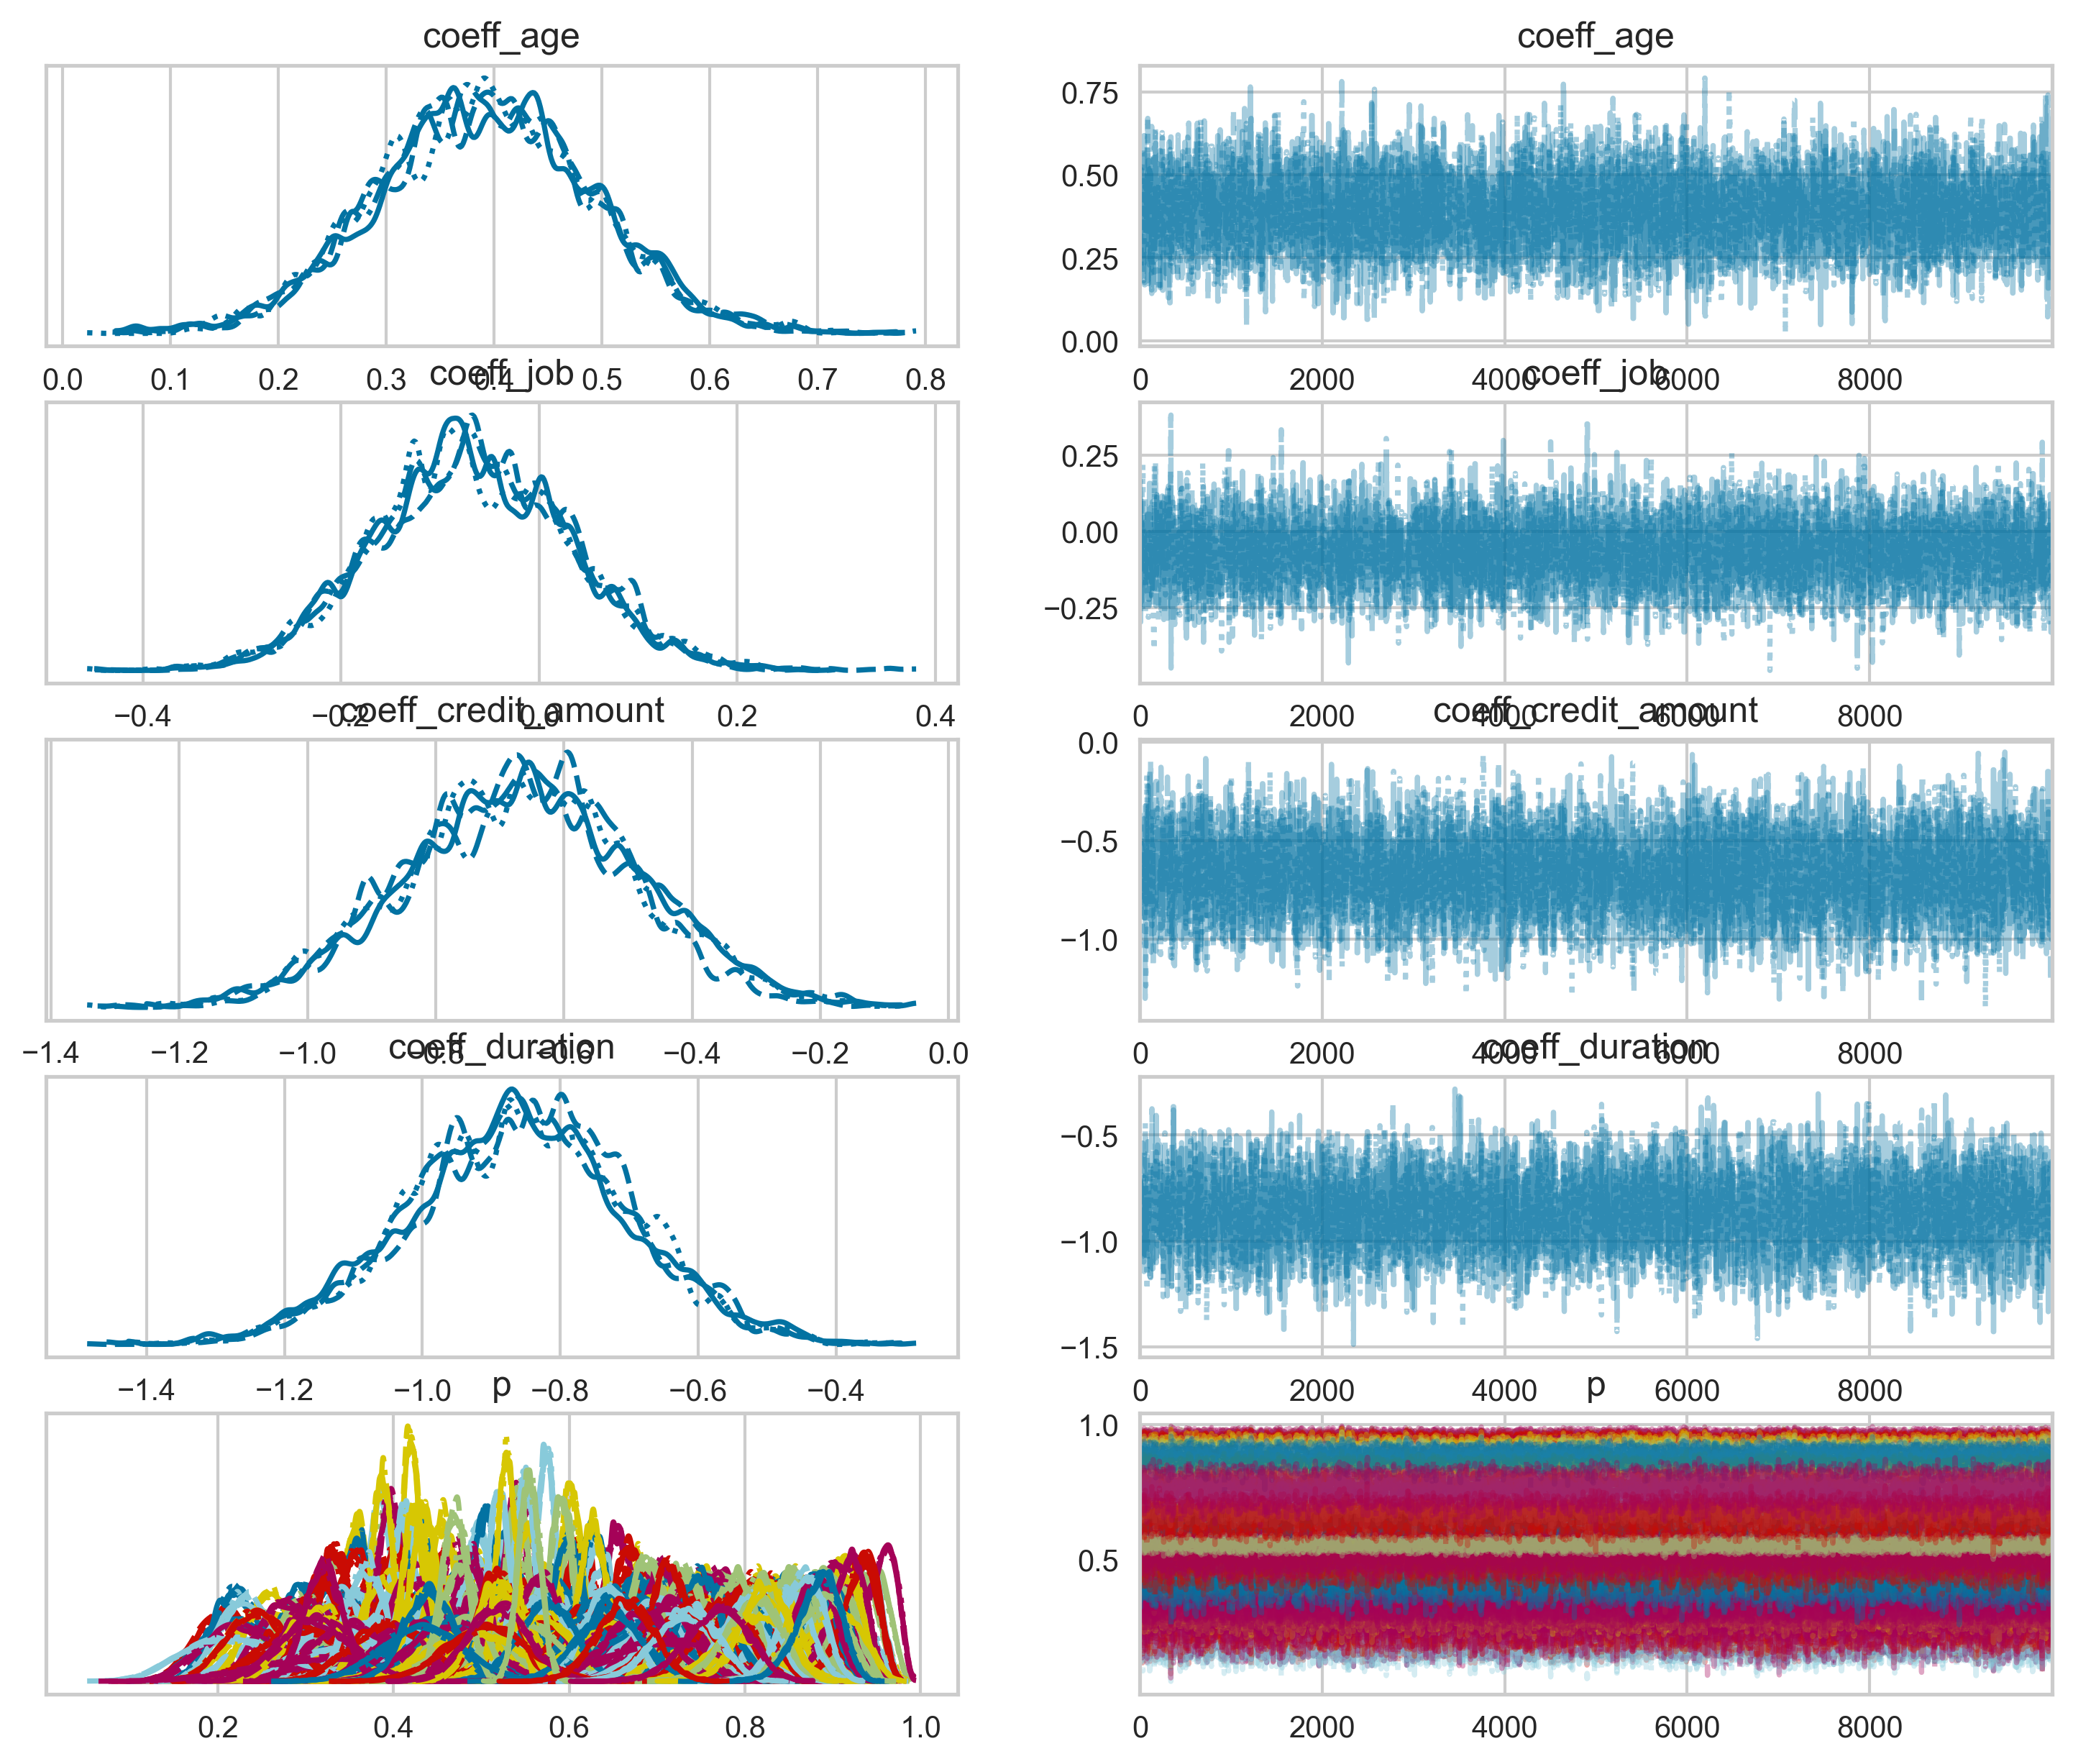

In [78]:
with logistic_model2:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step,progressbar = False)
az.plot_trace(trace)
plt.show()

In [79]:
with logistic_model2:
    display(az.summary(trace, round_to=6)[:4])

mean        sd    hdi_3%   hdi_97%  mcse_mean  \
coeff_age            0.390236  0.100139  0.198982  0.568938   0.001341   
coeff_job           -0.067856  0.098608 -0.255908  0.110801   0.001275   
coeff_credit_amount -0.668208  0.182220 -1.008661 -0.326956   0.002840   
coeff_duration      -0.859799  0.158464 -1.149884 -0.552452   0.002522   

                      mcse_sd     ess_bulk     ess_tail     r_hat  
coeff_age            0.000948  5575.843609  6257.847377  1.000611  
coeff_job            0.000955  5979.486476  5831.254958  1.000785  
coeff_credit_amount  0.002008  4118.252326  5480.322483  1.002835  
coeff_duration       0.001784  3948.100465  5230.183473  1.001377

## SVC for PD Estimation

In [80]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time

In [81]:
param_svc = {'gamma': [1e-6, 1e-2],
             'C':[0.001,.09,1,5,10],
             'kernel':('linear','rbf')}

In [82]:
svc = SVC(class_weight='balanced')
halve_SVC = HalvingRandomSearchCV(svc, param_svc, 
                                  scoring = 'roc_auc', n_jobs=-1)
halve_SVC.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))

Best hyperparameters for first cluster in SVC nan with {'kernel': 'linear', 'gamma': 0.01, 'C': 5}


/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 569, in roc_auc_score
    return _average_binary_score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_scor

In [83]:
y_pred_SVC1 = halve_SVC.predict(X_test1)
print('The ROC AUC score of SVC for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_SVC1)))

The ROC AUC score of SVC for first cluster is 0.4868


In [84]:
halve_SVC.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 569, in roc_auc_score
    return _average_binary_score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_scor

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 569, in roc_auc_score
    return _average_binary_score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_scor

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 569, in roc_auc_score
    return _average_binary_score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_scor

Best hyperparameters for second cluster in SVC 0.7155723905723905 with {'kernel': 'linear', 'gamma': 0.01, 'C': 10}


In [85]:
y_pred_SVC2 = halve_SVC.predict(X_test2)
print('The ROC AUC score of SVC for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_SVC2)))

The ROC AUC score of SVC for first cluster is 0.5304


## RF for PD Estimation

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier(random_state=42)

In [88]:
param_rfc = {'n_estimators': [100, 300],
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6],
    'min_samples_split':[5, 10]}

In [89]:
halve_RF = HalvingRandomSearchCV(rfc, param_rfc,
                                 scoring = 'roc_auc', n_jobs=-1)
halve_RF.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

Best hyperparameters for first cluster in RF nan with {'n_estimators': 300, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}


In [90]:
y_pred_RF1 = halve_RF.predict(X_test1)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_RF1)))

The ROC AUC score of RF for first cluster is 0.5629


In [91]:
halve_RF.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 569, in roc_auc_score
    return _average_binary_score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_scor

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 569, in roc_auc_score
    return _average_binary_score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_scor

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 569, in roc_auc_score
    return _average_binary_score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_scor

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 569, in roc_auc_score
    return _average_binary_score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_scor

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anac

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.p

  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 338, in _binary_roc_auc_score
    raise ValueError(
ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

  warnings.warn(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
 

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 569, in roc_auc_score
    return _average_binary_score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_scor

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 384, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py", line 569, in roc_auc_score
    return _average_binary_score(
  File "/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_scor

/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rz/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

Best hyperparameters for second cluster in RF 0.6345564473284053 with {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'gini'}


In [92]:
y_pred_RF2 = halve_RF.predict(X_test2)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_RF2)))

The ROC AUC score of RF for first cluster is 0.5000


## NN for PD Estimation

In [93]:
from sklearn.neural_network import MLPClassifier

In [94]:
param_NN = {"hidden_layer_sizes": [(100, 50), (50, 50), (10, 100)],
            "solver": ["lbfgs", "sgd", "adam"], 
            "learning_rate_init": [0.001, 0.05]}

In [95]:
MLP = MLPClassifier(random_state=42)

In [96]:
param_halve_NN = HalvingRandomSearchCV(MLP, param_NN,
                                       scoring = 'roc_auc')
param_halve_NN.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in NN are {}'.
      format(param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN are {'solver': 'sgd', 'learning_rate_init': 0.05, 'hidden_layer_sizes': (10, 100)}


In [97]:
y_pred_NN1 = param_halve_NN.predict(X_test1)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_NN1)))

The ROC AUC score of NN for first cluster is 0.6184


In [98]:
param_halve_NN.fit(X_train2, y_train2)
print('Best hyperparameters for first cluster in NN are {}'.
      format(param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN are {'solver': 'sgd', 'learning_rate_init': 0.05, 'hidden_layer_sizes': (100, 50)}


In [99]:
y_pred_NN2 = param_halve_NN.predict(X_test2)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_NN2)))

The ROC AUC score of NN for first cluster is 0.5242


## DL for PD Estimation

In [100]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
def DL_risk(dropout_rate,verbose=0):
    model = keras.Sequential()
    model.add(Dense(128,kernel_initializer='normal', 
        activation = 'relu', input_dim=4))
    model.add(Dense(64, kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dense(8,kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model

In [ ]:
parameters = {'batch_size':  [10, 50, 100],
          'epochs':  [50, 100, 150],
             'dropout_rate':[0.2, 0.4]}
model = KerasClassifier(build_fn = DL_risk)
gs = GridSearchCV(estimator = model,
                       param_grid = parameters,
                          scoring = 'roc_auc')

In [ ]:
gs.fit(X_train1, y_train1, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
      format(gs.best_params_))

In [ ]:
model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate = gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train1, y_train1)
DL_predict1 = model.predict(X_test1)
DL_ROC_AUC = roc_auc_score(y_test1, pd.DataFrame(DL_predict1.flatten()))
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

In [ ]:
gs.fit(X_train2.values, y_train2.values, verbose=0)
print('Best parameters for second cluster in DL are {}'.
      format(gs.best_params_))

In [ ]:
model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate= gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train2, y_train2)
DL_predict2 =  model.predict(X_test2)
DL_ROC_AUC = roc_auc_score(y_test2, DL_predict2.flatten()) 
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))